In [1]:
%load_ext autoreload
%autoreload 2

In [2]:

import os
import json
import pickle


# Data Wrangling
import h5py
import numpy as np
import pandas as pd

# Plotting
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

#from utils.utils_bouts import NameCat,NameCatSym
from classification.template_bouts import Knn_Training_Dataset
from utils.utils_bouts import NameCat


# Load Head Restrained bouts:

In [3]:
folder = 'G://Megabouts_dataset//Head_Restrained_Pipeline//'
file_list=[]
for file in os.listdir(folder):
    if file.endswith(".pickle"):
        file_list.append(os.path.join(folder, file))
        
N = 25000*len(file_list)
tail_array_HR_fish = np.zeros((N,7,140))
bout_cat_HR_fish = np.zeros(N)

i = 0
for i_f,filename in enumerate(file_list):
    
    print(i_f)
    with open(filename, 'rb') as handle:
                pipeline_results = pickle.load(handle)
                   
    pipeline = pipeline_results['pipeline']

    tail_array = pipeline['tail_array']
    bout_cat_ = pipeline['bout_cat']
    n = len(bout_cat_)

    tail_array_HR_fish[i:i+n,:,:] = tail_array
    bout_cat_HR_fish[i:i+n] = bout_cat_
    i = i+n
    
tail_array_HR_fish = tail_array_HR_fish[:i]
bout_cat_HR_fish = bout_cat_HR_fish[:i]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35


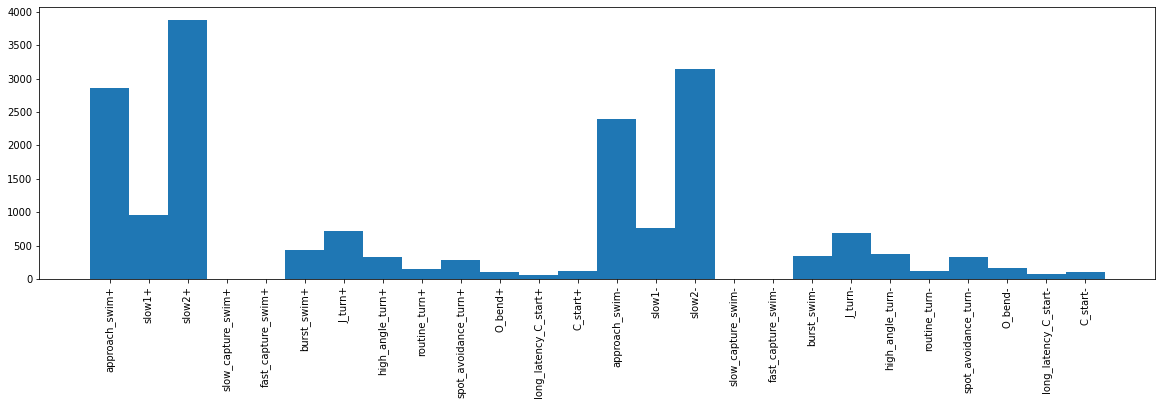

In [4]:
fig, ax = plt.subplots(facecolor='white',figsize=(20,5)) 
plt.hist(bout_cat_HR_fish,np.linspace(-0.5,25.5,27))
plt.xticks(np.arange(26),NameCat, rotation='vertical')
plt.show()

In [8]:

# Flatten Matrix:
tail_array_HR_flat = np.reshape(tail_array_HR_fish,(tail_array_HR_fish.shape[0],tail_array_HR_fish.shape[1]*tail_array_HR_fish.shape[2]))


# Remove tracking error and small amplitude bouts

In [143]:
.shape

(18391, 7, 139)

In [145]:
ampl = np.linalg.norm(tail_array_HR_fish,axis=(1,2))/140
ampl_diff = np.linalg.norm(np.diff(tail_array_HR_fish,axis=2),axis=(1,2))/139

ampl = ampl/np.median(ampl)+ampl_diff/np.median(ampl_diff)

<ipython-input-146-b31345655097>:2: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


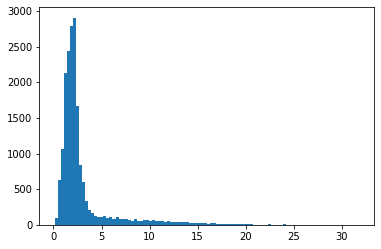

In [146]:
plt.hist(ampl,100)
plt.show()

0


<ipython-input-104-0f812d9a2ef0>:2: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


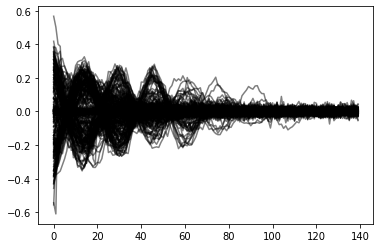

In [153]:
val = []
for p in np.linspace(0,0.1,100):
    val.append(np.percentile(ampl,p))

In [154]:
id = np.argsort(ampl)
f = int(np.ceil(len(id)/100))
id = id[::f]
print(len(id))

100


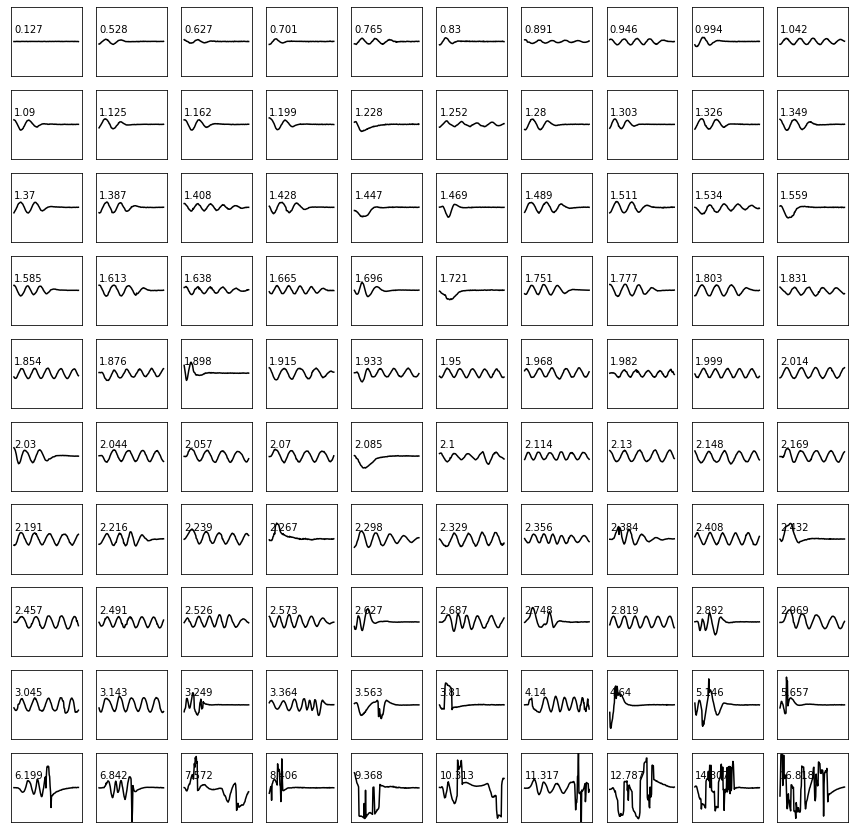

In [155]:
fig = plt.figure(figsize=(15,15))   

n=10
gs = fig.add_gridspec(n, n)

for i in range(n):
    for j in range(n):
        ax = fig.add_subplot(gs[i,j])
        ax.set_ylim(-4,4)
        ax.set_yticks([])
        ax.set_xticks([])
        try:
            k = j+i*n
            k = id[k]
            ax.text(0,1,str(np.round(ampl[k],3)))
            ax.plot(tail_array_HR_flat[k,140*6:140*7].T,'k',alpha=1)
        except:
            pass
    

In [159]:
min_ampl = 0.5
max_ampl = 3.2

145


<ipython-input-161-e8986e092c41>:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


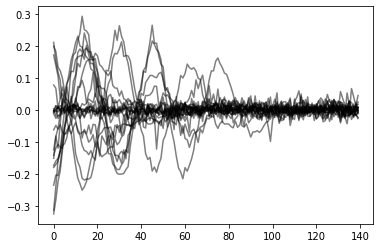

In [161]:
id = np.where(ampl<min_ampl)[0]
print(len(id))
i = np.random.choice(id,20)
plt.plot(tail_array_HR_flat[i,140*6:].T,'k',alpha=0.5)
plt.show()

3380


<ipython-input-162-91b4ee90797b>:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


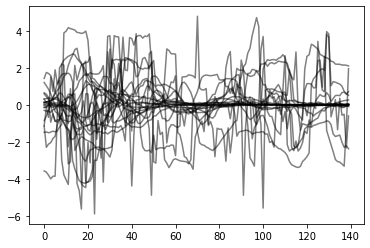

In [162]:
id = np.where(ampl>max_ampl)[0]
print(len(id))
i = np.random.choice(id,20)
plt.plot(tail_array_HR_flat[i,140*6:].T,'k',alpha=0.5)
plt.show()

In [163]:
id = np.where((ampl>min_ampl)&(ampl<max_ampl))[0]

In [167]:
tail_array = tail_array_HR_fish[id,:,:]
# Flatten Matrix:
tail_array_flat = np.reshape(tail_array,(tail_array.shape[0],tail_array.shape[1]*tail_array.shape[2]))
bout_cat = bout_cat_HR_fish[id]

# Color Code:

In [168]:
#dict_color_species = {'Tu':'#f94144','Giant':'#90be6d','Danionella':'#277da1'}
dict_color_bouts = {}
dict_color_bouts[0] = '#82cfff'
dict_color_bouts[1] = '#4589ff'
dict_color_bouts[2] = '#0000c8'
dict_color_bouts[3] = '#5d5d66'
dict_color_bouts[4] = '#000000'
dict_color_bouts[5] = '#fcaf6d'
dict_color_bouts[6] = '#ffb3b8'
dict_color_bouts[7] = '#08bdba'
dict_color_bouts[8] = '#24a148'
dict_color_bouts[9] = '#9b82f3'
dict_color_bouts[10] = '#ee5396'
dict_color_bouts[11] = '#e3bc13'
dict_color_bouts[12] = '#fa4d56'

dict_color_bouts[13] = '#82cfff'
dict_color_bouts[14] = '#4589ff'
dict_color_bouts[15] = '#0000c8'
dict_color_bouts[16] = '#5d5d66'
dict_color_bouts[17] = '#000000'
dict_color_bouts[18] = '#fcaf6d'
dict_color_bouts[19] = '#ffb3b8'
dict_color_bouts[20] = '#08bdba'
dict_color_bouts[21] = '#24a148'
dict_color_bouts[22] = '#9b82f3'
dict_color_bouts[23] = '#ee5396'
dict_color_bouts[24] = '#e3bc13'
dict_color_bouts[25] = '#fa4d56'
#dict_color_species = {'Tu':(249/255., 65/255., 68/255.),'Giant':(144/255., 190/255., 109/255.),'Danionella':(39/255., 125/255., 161/255.)}

list_color_no_CS = ['#82cfff','#4589ff','#0000c8','#fcaf6d','#ffb3b8','#08bdba','#24a148','#9b82f3','#ee5396','#e3bc13','#fa4d56']
list_color_w_CS = ['#82cfff','#4589ff','#0000c8','#5d5d66','#000000','#fcaf6d','#ffb3b8','#08bdba','#24a148','#9b82f3','#ee5396','#e3bc13','#fa4d56']

NameCatSym_w_CS = []

NameCatSym_w_CS=['approach_swim', 'slow1', 'slow2', 'slow_capture_swim','fast_capture_swim', 'burst_swim', 'J_turn', 'high_angle_turn','routine_turn', 'spot_avoidance_turn', 'O_bend','long_latency_C_start', 'C_start']
NameCatSym_no_CS=['approach_swim', 'slow1', 'slow2', 'burst_swim', 'J_turn', 'high_angle_turn','routine_turn', 'spot_avoidance_turn', 'O_bend','long_latency_C_start', 'C_start']

<ipython-input-169-15a769a99bc7>:16: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


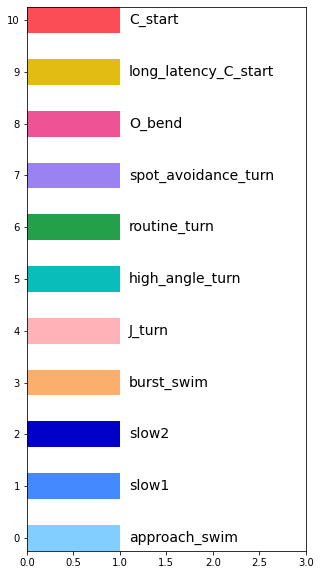

In [169]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

fig, ax = plt.subplots(figsize=(5,10))
for i,c in enumerate(list_color_no_CS):
    ax.add_patch(Rectangle(xy=(0,i*2), width=1,
                      height=1, facecolor=c))
    ax.text(1.1, i*2+0.5, NameCatSym_no_CS[i], fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')                     
ax.set_ylim(0,21)
ax.set_xlim(0,3)
ax.set_yticks(np.arange(0,22,2)+0.5)
ax.set_yticklabels(np.arange(11))
plt.show()

## Unsupervised UMAP:

In [170]:
import umap
import umap.plot

In [173]:
#reducer = umap.UMAP(n_components=2,verbose=True,densmap=True)
reducer = umap.UMAP(n_components=2,verbose=True,n_neighbors=100,min_dist=0.2)
embedding = reducer.fit_transform(tail_array_flat)

UMAP(min_dist=0.2, n_neighbors=100, verbose=True)
Fri Aug  5 07:40:27 2022 Construct fuzzy simplicial set
Fri Aug  5 07:40:27 2022 Finding Nearest Neighbors
Fri Aug  5 07:40:27 2022 Building RP forest with 11 trees
Fri Aug  5 07:40:28 2022 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	Stopping threshold met -- exiting after 3 iterations
Fri Aug  5 07:40:51 2022 Finished Nearest Neighbor Search
Fri Aug  5 07:40:51 2022 Construct embedding


Epochs completed: 100%| ██████████ 200/200 [00:14]

Fri Aug  5 07:41:09 2022 Finished embedding


<Figure size 1440x1440 with 0 Axes>

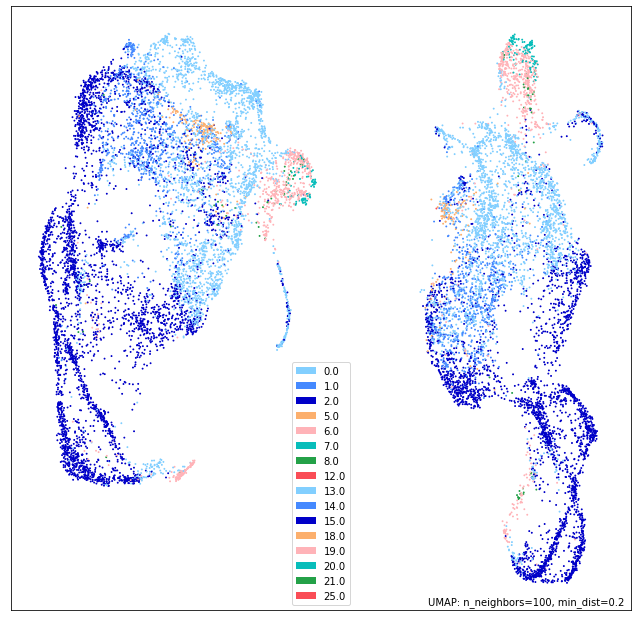

In [174]:
plt.figure(figsize=(20,20))
umap.plot.points(reducer,labels=bout_cat,color_key=dict_color_bouts)
plt.draw()

In [175]:
import datashader as ds
import datashader.transfer_functions as tf
import datashader.bundling as bd
import matplotlib.pyplot as plt
import colorcet
import matplotlib.colors
import matplotlib.cm

import bokeh.plotting as bpl
import bokeh.transform as btr
import holoviews as hv
import holoviews.operation.datashader as hd

from matplotlib.patches import Patch


In [176]:
def plot_Umap_res(points,label,dict_color_bouts,size=200,limit=None):
    
    #points = precomputed_knn_embeddings[0,0]
    if limit:
        min_x,min_y = -limit,-limit
        max_x,max_y = limit,limit
    else:
        
        min_x = np.nanmin(points[:, 0])
        max_x = np.nanmax(points[:, 0])
        min_y = np.nanmin(points[:, 1])
        max_y = np.nanmax(points[:, 1])

    width=size
    height=size
    alpha = 255
    color_key = dict_color_bouts
    extent = (
        np.round(min_x - 0.05 * (max_x - min_x)),
        np.round(max_x + 0.05 * (max_x - min_x)),
        np.round(min_y - 0.05 * (max_y - min_y)),
        np.round(max_y + 0.05 * (max_y - min_y)),
    )
    canvas = ds.Canvas(
        plot_width=width,
        plot_height=height,
        x_range=(extent[0], extent[1]),
        y_range=(extent[2], extent[3]),
    )

    data = pd.DataFrame(points, columns=("x", "y"))

    data["label"] = pd.Categorical(label)
    aggregation = canvas.points(data, "x", "y", agg=ds.count_cat("label"))

    legend_elements = [Patch(facecolor=color_key[k], label=k) for k in color_key.keys()]
    result = tf.shade(aggregation, color_key=color_key, how="eq_hist", alpha=alpha)
    
    return result

In [179]:
res = plot_Umap_res(embedding,bout_cat,dict_color_bouts)

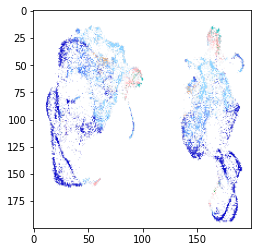

In [180]:
plt.imshow(res.to_pil())

# Clustering attempt:

In [181]:
import numpy as np
from scipy.fft import fft2, ifft2, fftshift
import copy
import matplotlib as mpl
from scipy.io import loadmat
import h5py
import matplotlib.colors
import os

def gencmap():
    """
    Get behavioral map colormap as a matplotlib colormap instance.
    :return: Matplotlib colormap instance.
    """
    colors = np.zeros((64, 3))
    colors[:21, 0] = np.linspace(1, 0, 21)
    colors[20:43, 0] = np.linspace(0, 1, 23)
    colors[42:, 0] = 1.0

    colors[:21, 1] = np.linspace(1, 0, 21)
    colors[20:43, 1] = np.linspace(0, 1, 23)
    colors[42:, 1] = np.linspace(1, 0, 22)

    colors[:21, 2] = 1.0
    colors[20:43, 2] = np.linspace(1, 0, 23)
    colors[42:, 2] = 0.0
    return mpl.colors.ListedColormap(colors)


def createProjectDirectory(pathToProject):
    _dirs = [pathToProject, '%s/Projections'%pathToProject,
             '%s/TSNE_Projections'%pathToProject,
             '%s/TSNE'%pathToProject, '%s/UMAP'%pathToProject]
    for d in _dirs:
        if not os.path.exists(d):
            print('Creating : %s'%d)
            os.mkdir(d)
        else:
            print('Skipping, path already exists : %s'%d)
    return

def getDensityBounds(density, thresh=1e-6):
    """
    Get the outline for density maps.
    :param density: m by n density image.
    :param thresh: Density threshold for boundaries. Default 1e-6.
    :return: (p by 2) points outlining density map.
    """
    x_w, y_w = np.where(density > thresh)
    x, inv_inds = np.unique(x_w, return_inverse=True)
    bounds = np.zeros((x.shape[0] * 2 + 1, 2))
    for i in range(x.shape[0]):
        bounds[i, 0] = x[i]
        bounds[i, 1] = np.min(y_w[x_w == bounds[i, 0]])
        bounds[x.shape[0] + i, 0] = x[-i - 1]
        bounds[x.shape[0] + i, 1] = np.max(y_w[x_w == bounds[x.shape[0] + i, 0]])
    bounds[-1] = bounds[0]
    bounds[:, [0, 1]] = bounds[:, [1, 0]]
    return bounds.astype(int)


def findPointDensity(zValues, sigma, numPoints, rangeVals):
    """
    findPointDensity finds a Kernel-estimated PDF from a set of 2D data points
    through convolving with a gaussian function.
    :param zValues: 2d points of shape (m by 2).
    :param sigma: standard deviation of smoothing gaussian.
    :param numPoints: Output density map dimension (n x n).
    :param rangeVals: 1 x 2 array giving the extrema of the observed range
    :return:
        bounds -> Outline of the density map (k x 2).
        xx -> 1 x numPoints array giving the x and y axis evaluation points.
%       density -> numPoints x numPoints array giving the PDF values (n by n) density map.
    """
    xx = np.linspace(rangeVals[0], rangeVals[1], numPoints)
    yy = copy.copy(xx)
    [XX, YY] = np.meshgrid(xx, yy)
    G = np.exp(-0.5 * (np.square(XX) + np.square(YY)) / np.square(sigma))
    Z = np.histogramdd(zValues, bins=[xx, yy])[0]
    Z = Z / np.sum(Z)
    Z = np.pad(Z, ((0, 1), (0, 1)), mode='constant', constant_values=((0, 0), (0, 0)))
    density = fftshift(np.real(ifft2(np.multiply(fft2(G), fft2(Z))))).T
    density[density < 0] = 0
    bounds = getDensityBounds(density)
    return bounds, xx, density



def randomizewshed(wshed):
    outwshed = np.zeros_like(wshed)
    regs = np.unique(wshed)[1:]
    np.random.shuffle(regs)
    for i, wreg in enumerate(regs):
        outwshed[wshed==wreg] = i
    return outwshed

def gencmap():
    """
    Get behavioral map colormap as a matplotlib colormap instance.
    :return: Matplotlib colormap instance.
    """
    colors = np.zeros((64, 3))
    colors[:21, 0] = np.linspace(1, 0, 21)
    colors[20:43, 0] = np.linspace(0, 1, 23)
    colors[42:, 0] = 1.0

    colors[:21, 1] = np.linspace(1, 0, 21)
    colors[20:43, 1] = np.linspace(0, 1, 23)
    colors[42:, 1] = np.linspace(1, 0, 22)

    colors[:21, 2] = 1.0
    colors[20:43, 2] = np.linspace(1, 0, 23)
    colors[42:, 2] = 0.0
    return mpl.colors.ListedColormap(colors)




In [182]:
X = embedding
print(X.shape)

(14866, 2)


In [197]:
m = np.abs(X).max()
print(m)

sigma=0.5
_, xx, density = findPointDensity(X, sigma, 511, [-m-1, m+1])


15.311548


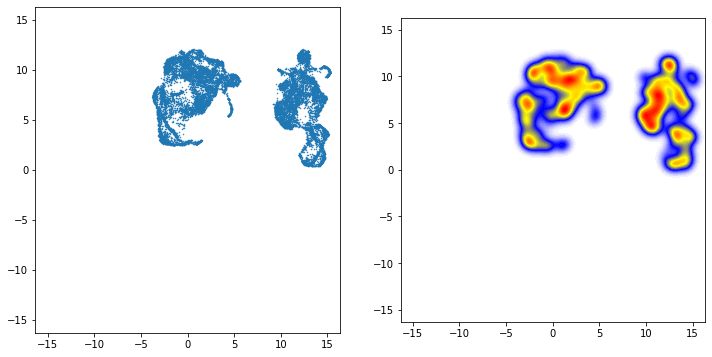

In [201]:


fig, axes = plt.subplots(1, 2, figsize=(12,6))
axes[0].scatter(X[::1,0], X[::1,1], marker='.', s=1)
axes[0].set_xlim([-m-1, m+1])
axes[0].set_ylim([-m-1, m+1])

axes[1].imshow(density, cmap=gencmap(), extent=(xx[0], xx[-1], xx[0], xx[-1]), origin='lower')

In [202]:

from skimage.segmentation import watershed
from skimage.filters import roberts
from sklearn.mixture import GaussianMixture


In [203]:
wshed = watershed(-density, connectivity=10)
wshed[density < 1e-4] = 0
numRegs = len(np.unique(wshed)) - 1
print(numRegs)

24


In [204]:
wshed.shape
bmapcmap=gencmap()

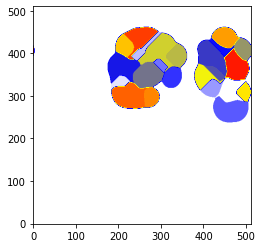

In [205]:

plt.imshow(randomizewshed(wshed), origin='lower', cmap=bmapcmap)


In [206]:
for i, wreg in enumerate(np.unique(wshed)):
    wshed[wshed == wreg] = i
wbounds = np.where(roberts(wshed).astype('bool'))
wbounds = (wbounds[1], wbounds[0])

In [207]:
wbounds[0].shape

(3685,)

(-0.5, 510.5, -0.5, 510.5)

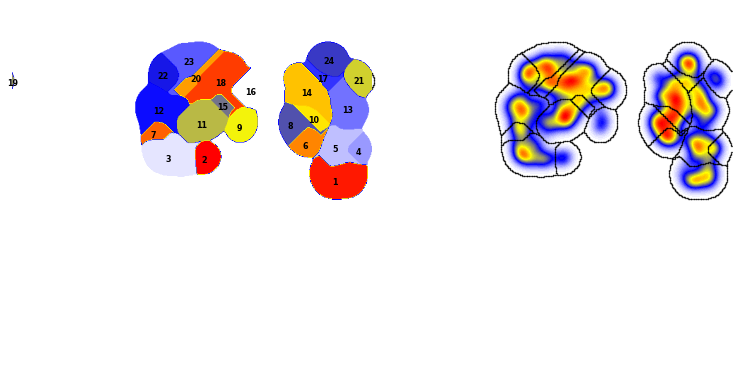

In [208]:
plt.switch_backend('Agg')

fig, axes = plt.subplots(1, 2, figsize=(10, 6))
fig.subplots_adjust(0, 0, 1, 1, 0, 0)
ax = axes[0]
ax.imshow(randomizewshed(wshed), origin='lower', cmap=bmapcmap)
for i in np.unique(wshed)[1:]:
    fontsize = 8
    xinds, yinds = np.where(wshed == i)
    ax.text(np.mean(yinds) - fontsize, np.mean(xinds) - fontsize, str(i), fontsize=fontsize, fontweight='bold')
ax.axis('off')

ax = axes[1]
ax.imshow(density, origin='lower', cmap=bmapcmap)
ax.scatter(wbounds[0], wbounds[1], color='k', s=0.1)
ax.axis('off')

In [209]:
#LL, wbounds, sigma, xx, density = wshedTransform(zValues, minimum_regions, startsigma, tsnefolder, saveplot=True)

print('Assigning watershed regions...')
watershedRegions = np.digitize(X, xx)
watershedRegions = wshed[watershedRegions[:, 1], watershedRegions[:, 0]]


Assigning watershed regions...


In [210]:
watershedRegions.shape

(14866,)

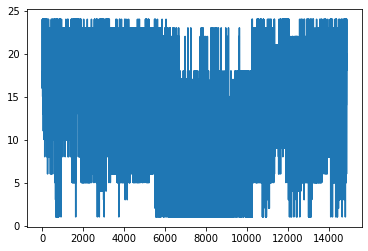

In [211]:
plt.plot(watershedRegions)

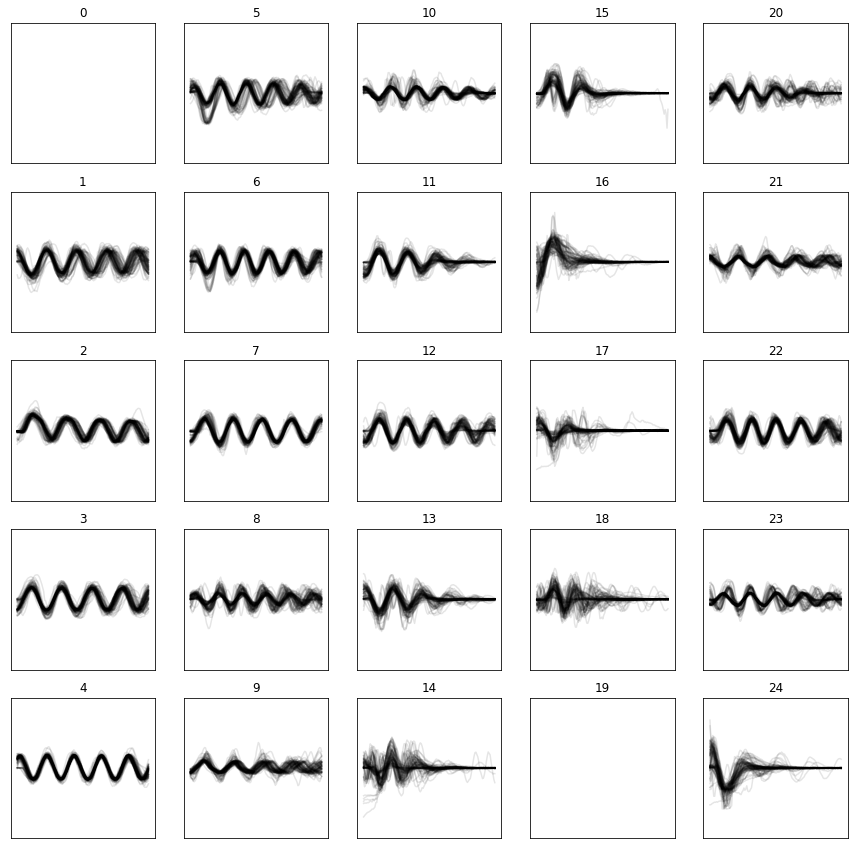

In [212]:


fig = plt.figure(figsize=(15,15))   

n=int(np.ceil(np.sqrt(len(np.unique(watershedRegions)))))
gs = fig.add_gridspec(n, n)

for i in range(n):
    for j in range(n):
        ax = fig.add_subplot(gs[i,j])
        ax.set_ylim(-4,4)
        ax.set_yticks([])
        ax.set_xticks([])
        try:
            b = i+j*n
            id = np.where(watershedRegions==b)[0]
            id = id[0:min(100,len(id))]
            ax.set_title(str(b))
            ax.plot(tail_array_flat[id,140*6:140*7].T,'k',alpha=0.1)
        except:
            pass
    

In [217]:
folder = 'G://Megabouts_dataset//Head_Restrained_Pipeline//'
file_list=[]
for file in os.listdir(folder):
    if file.endswith(".pickle"):
        file_list.append(os.path.join(folder, file))
        
N = 25000*len(file_list)
Tensor = np.zeros((3500,7,0))
i = 0

for i_f,filename in enumerate(file_list):
    
    print(i_f)
    with open(filename, 'rb') as handle:
                pipeline_results = pickle.load(handle)
                   
    pipeline = pipeline_results['pipeline']

    tail_array = pipeline['tail_array']
    bout_cat_ = pipeline['bout_cat']
    tail_angle = pipeline['tail_angle_detrend']
    
    N = int(np.floor(tail_angle.shape[0]/3500))
    tail_angle = tail_angle[:3500*N,:]
    sample = tail_angle.reshape(N,3500,7)
    sample = np.swapaxes(sample,0,1)
    sample = np.swapaxes(sample,1,2)

    s = np.sum(np.abs(sample[:,-1,:]),axis=0)
    sample = sample[:,:,s>100]
    Tensor = np.concatenate((Tensor,sample),axis=2)
    print(Tensor.shape)

0
(3500, 7, 73)
1
(3500, 7, 144)
2
(3500, 7, 238)
3
(3500, 7, 389)
4
(3500, 7, 499)
5
(3500, 7, 580)
6
(3500, 7, 629)
7
(3500, 7, 683)
8
(3500, 7, 832)
9
(3500, 7, 879)
10
(3500, 7, 996)
11
(3500, 7, 1064)
12
(3500, 7, 1166)
13
(3500, 7, 1306)
14
(3500, 7, 1389)
15
(3500, 7, 1444)
16
(3500, 7, 1472)
17
(3500, 7, 1590)
18
(3500, 7, 1590)
19
(3500, 7, 1880)
20
(3500, 7, 1910)
21
(3500, 7, 1944)
22
(3500, 7, 2038)
23
(3500, 7, 2064)
24
(3500, 7, 2108)
25
(3500, 7, 2189)
26
(3500, 7, 2243)
27
(3500, 7, 2345)
28
(3500, 7, 2442)
29
(3500, 7, 2519)
30
(3500, 7, 2609)
31
(3500, 7, 2709)
32
(3500, 7, 2745)
33
(3500, 7, 2815)
34
(3500, 7, 2890)
35
(3500, 7, 2954)


# Manual Selection of tensor

360


<ipython-input-685-7bde17633266>:6: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
<ipython-input-685-7bde17633266>:11: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


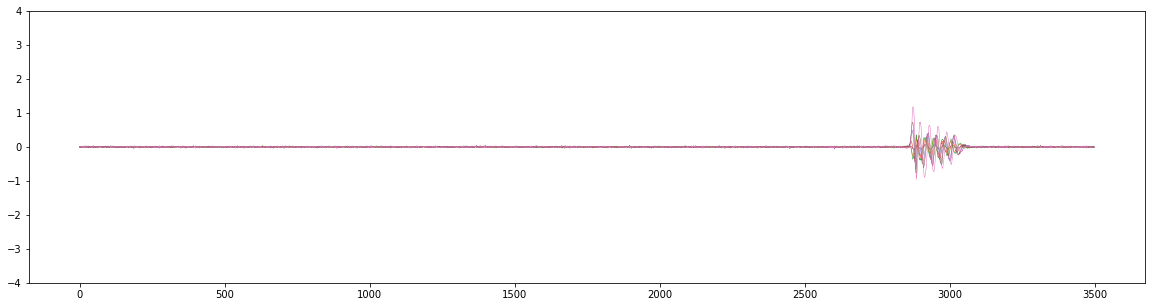

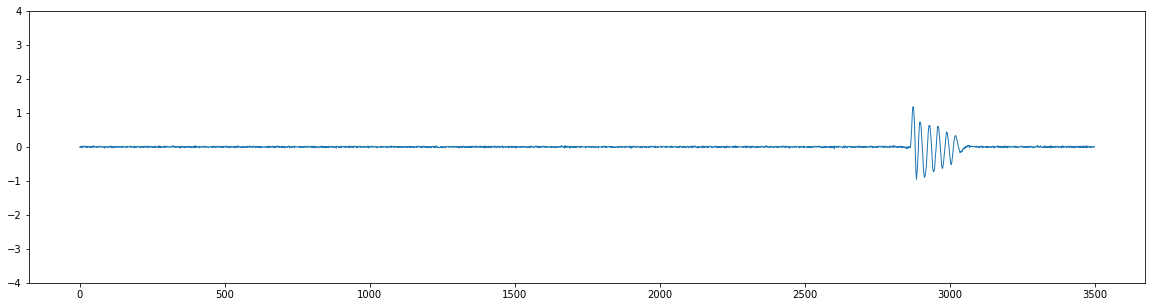

In [685]:
i = np.random.randint(Tensor.shape[2])
print(i)
plt.figure(figsize=(20,5))
plt.plot(Tensor[:,:,i],lw=0.5)
plt.ylim(-4,4)
plt.show()

plt.figure(figsize=(20,5))
plt.plot(Tensor[:,-1,i],lw=1)
plt.ylim(-4,4)
plt.show()

In [687]:
id = [51,91,104,106,108,112,129,143,186,193,201,355,360,416,521,541,553,721,757,763,764,808,819,827,900,912,971,
      1071,1074,1082,1088,1137,1185,1187,1228,1250,1268,1288,1295,1305,1330,1525,1585,1632,1686,1702,1713,1716,1718,1765,1769,1788,1802,1820,1834,1836,1888,1911,1939,
      2094,2136,2137,2142,2144,2147,2156,2220,2247,2272,2314,2358,2361,2372,2381,2395,2412,2423,2433,2469,2478,
      2502,2550,2591,2612,2616,2628,2623,2725,2775,2779,2784,2798,2813,2833,2852,2858,2906,2911,2924,2949]
print(len(id))

100


In [688]:
Tensor_selected = Tensor[:,:,id]

In [689]:
np.save('TensorHeadRestrained_Selected.npy',Tensor_selected)

In [213]:
pipeline.keys()

dict_keys(['tracking_data', 'baseline', 'tail_angle_detrend', 'z', 'segments', 'tail_array', 'bout_cat'])

In [215]:
tail_angle.shape

(1266667, 7)

In [216]:

Tensor = np.zeros((3500,10,0))
stop = False
for i in range(len(ListTxt)):
        
    df = pd.read_csv(ListTxt[i])

    NumSegment = 16

    tail_angle = df[['angle'+str(i) for i in range(NumSegment)]]
    tail_angle = tail_angle.values
    #tail_angle = np.cumsum(tail_angle,axis=1)
    print(tail_angle.shape)
    tail_angle = tail_angle[:,1:]
    print(tail_angle.shape)

    tail_angle = resize(tail_angle, (tail_angle.shape[0], 10),order=0) # 0 for nearest neighbor
    tail = Tail(tail_angle)
    tail.tail_angle_preprocessing()

    tail_angle = tail.angle_smooth
    tail_angle_detrend = np.zeros_like(tail_angle) 
    
    ref_segment = 7
    x = np.copy(tail_angle[:,ref_segment])
    # Compute tail active
    trend = signal.savgol_filter(x, window_length=31, polyorder=1, deriv=0, delta=1.0, axis=- 1, mode='interp', cval=0.0)
    detrend = np.abs(x-trend)
    x = pd.DataFrame({'x':detrend})
    win = 15
    x = x.rolling(win).mean().values[:,0]
    BT,ax = estimate_threshold_using_GMM(x,margin_std=2.5,axis=None)

    baseline = np.zeros_like(x)
    tail_active = (x>BT)

    kernel = np.ones(40)
    filtered_timeforward = np.convolve(kernel,tail_active, mode='full')[:tail_active.shape[0]] # Trick to make convolution causal
    tail_active = 1.0*((filtered_timeforward)>0)#*filtered_timebackward)>0)

    # Remove too short activation:
    onset,offset,duration = find_onset_offset_numpy(tail_active)
    tail_active = 0*tail_active
    for on_,off_,dur_ in zip(onset,offset,duration):
        if dur_>60:
            tail_active[on_:off_]=1

    tail_angle_detrend = np.zeros_like(tail_angle)
    for s in range(tail_angle.shape[1]):

        baseline = np.zeros_like(tail_active)
        baseline[tail_active==0]=tail_angle[tail_active==0,s]
        onset,offset,duration = find_onset_offset_numpy(tail_active)
        for on_,off_,dur_ in zip(onset,offset,duration):
            tmp = tail_angle[on_:off_,s]
            if dur_>1:
                baseline[on_:off_] = tmp[0]#np.linspace(tmp[0],tmp[-1],dur_)
            else:
                baseline[on_] = tail_angle[on_,s]
        tail_angle_detrend[:,s] = tail_angle[:,s]-baseline

    N = int(np.floor(tail_angle_detrend.shape[0]/3500))
    tail_angle_detrend = tail_angle_detrend[:3500*N,:]
    sample = tail_angle_detrend.reshape(N,3500,10)
    sample = np.swapaxes(sample,0,1)
    sample = np.swapaxes(sample,1,2)

    s = np.sum(np.abs(sample[:,-1,:]),axis=0)
    sample = sample[:,:,s>100]
    Tensor = np.concatenate((Tensor,sample),axis=2)
    print(Tensor.shape)
    



NameError: name 'ListTxt' is not defined

47


<ipython-input-433-177373cf482b>:16: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


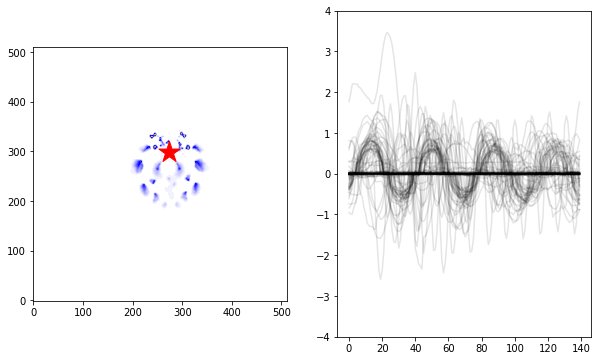

In [433]:
b = np.random.randint(len(np.unique(watershedRegions)))
print(b)
id = np.where(watershedRegions==b)[0]
id = id[0:min(100,len(id))]
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
ax = axes[0]
ax.imshow(density, origin='lower', cmap=bmapcmap)
fontsize = 8
xinds, yinds = np.where(wshed == b)
#ax.text(np.mean(yinds) - fontsize, np.mean(xinds) - fontsize, str(i), fontsize=fontsize, fontweight='bold')
ax.scatter(np.mean(yinds),np.mean(xinds),s=500,c='r',marker='*')
#ax.axis('off')

axes[1].plot(tail_array_flat_all_fish[id,140*6:140*7].T,'k',alpha=0.1)
axes[1].set_ylim(-4,4)
plt.show()

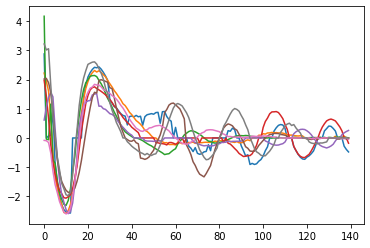

In [284]:
plt.plot(tail_array_flat[id[::10],140*6:140*7].T)

# Apply Clustering to head restrained

<ipython-input-285-d6baf55ea092>:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


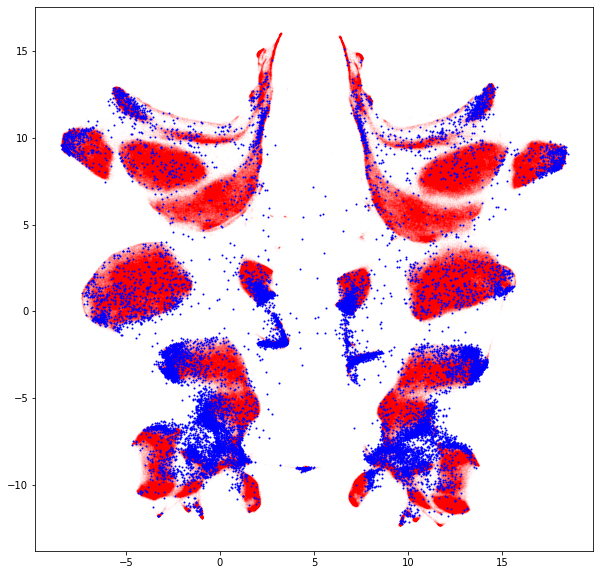

In [285]:
plt.figure(figsize=(10,10))
plt.scatter(embedding[:,0],embedding[:,1],s=1,alpha=0.01,c='red')
plt.scatter(embadding_HR[:,0],embadding_HR[:,1],s=1,c='blue')
plt.show()

In [286]:
all_embedding = np.concatenate((embedding,embadding_HR))

In [294]:
import sklearn.neighbors
model_ = sklearn.neighbors.LocalOutlierFactor(contamination=0.02)
outlier_scores = model_.fit_predict(all_embedding)


In [295]:
outlier_scores_HR = outlier_scores[embedding.shape[0]:]
id_outliers = np.where(outlier_scores_HR==-1)[0]
id_inliers = np.where(outlier_scores_HR==1)[0]


<ipython-input-356-106004184c90>:5: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


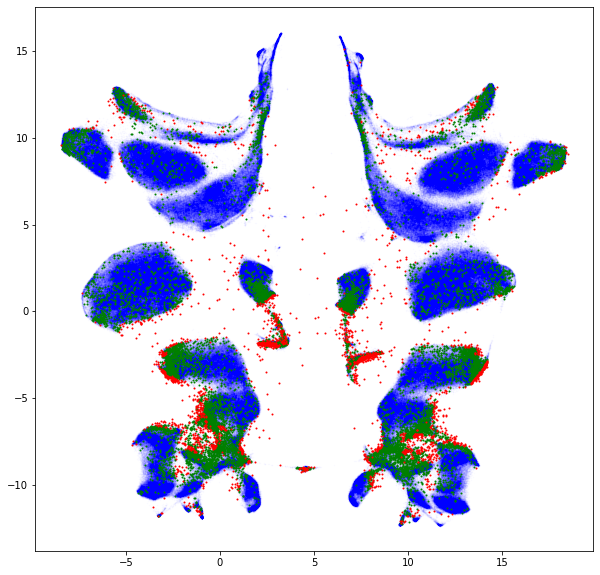

In [356]:
plt.figure(figsize=(10,10))
plt.scatter(embedding[:,0],embedding[:,1],s=1,alpha=0.01,c='blue')
plt.scatter(embadding_HR[id_inliers,0],embadding_HR[id_inliers,1],s=1,c='green')
plt.scatter(embadding_HR[id_outliers,0],embadding_HR[id_outliers,1],s=1,c='red')
plt.show()

8948


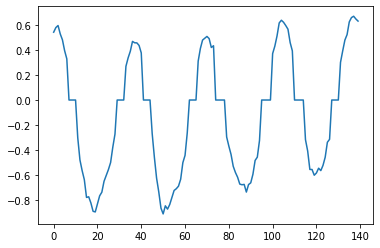

In [357]:
i = np.random.choice(id_inliers)
print(i)
plt.plot(tail_array_HR_flat[i,140*6:])

In [332]:
watershedRegions_HR = np.digitize(embadding_HR, xx)
watershedRegions_HR = wshed[watershedRegions_HR[:, 1], watershedRegions_HR[:, 0]]

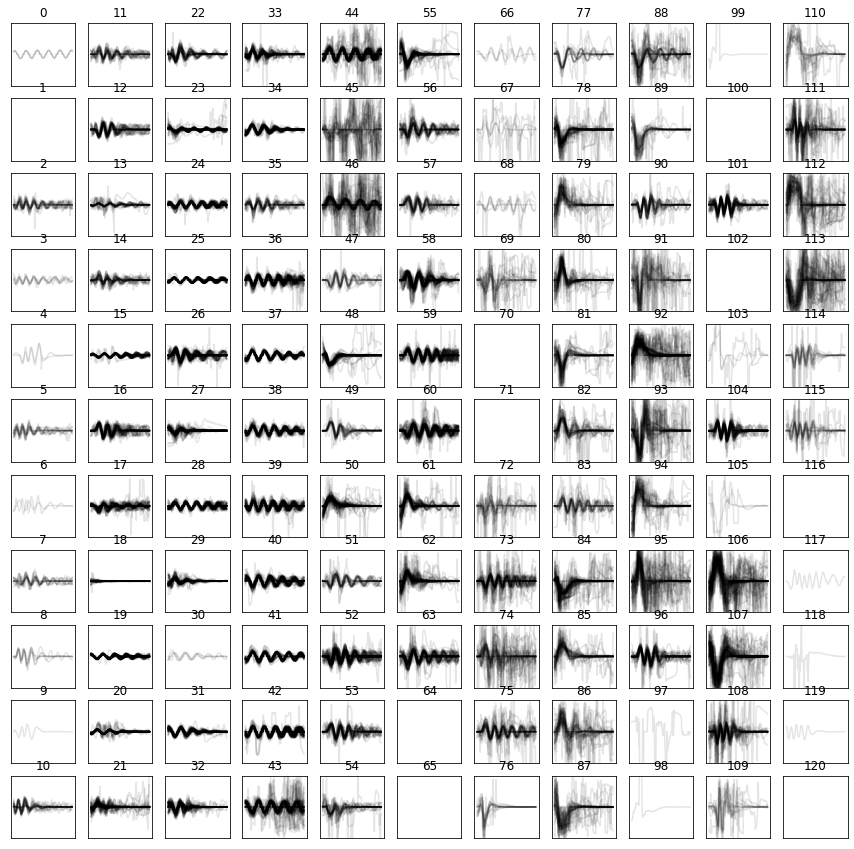

In [335]:


fig = plt.figure(figsize=(15,15))   

n=int(np.ceil(np.sqrt(len(np.unique(watershedRegions_HR)))))
gs = fig.add_gridspec(n, n)

for i in range(n):
    for j in range(n):
        ax = fig.add_subplot(gs[i,j])
        ax.set_ylim(-4,4)
        ax.set_yticks([])
        ax.set_xticks([])
        try:
            b = i+j*n
            id = np.where((watershedRegions_HR==b))[0]
            id = np.intersect1d(id,id_inliers)
            id = id[0:min(100,len(id))]
            ax.set_title(str(b))
            ax.plot(tail_array_HR_flat[id,140*6:140*7].T,'k',alpha=0.1)
        except:
            pass
    

113


<ipython-input-359-b5a59f80b8fc>:17: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


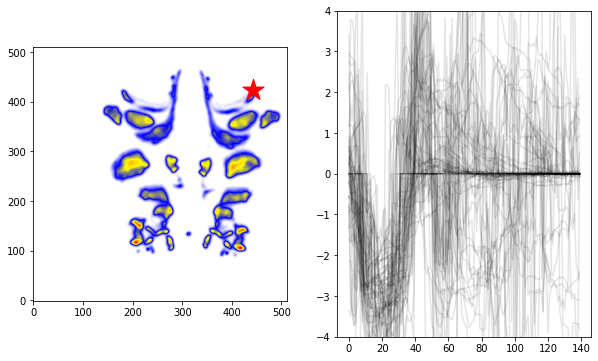

In [359]:
b = np.random.randint(len(np.unique(watershedRegions_HR)))
print(b)
id = np.where((watershedRegions_HR==b))[0]
id = np.intersect1d(id,id_inliers)
id = id[0:min(100,len(id))]
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
ax = axes[0]
ax.imshow(density, origin='lower', cmap=bmapcmap)
fontsize = 8
xinds, yinds = np.where(wshed == b)
#ax.text(np.mean(yinds) - fontsize, np.mean(xinds) - fontsize, str(i), fontsize=fontsize, fontweight='bold')
ax.scatter(np.mean(yinds),np.mean(xinds),s=500,c='r',marker='*')
#ax.axis('off')

axes[1].plot(tail_array_HR_flat[id,140*6:140*7].T,'k',alpha=0.1)
axes[1].set_ylim(-4,4)
plt.show()

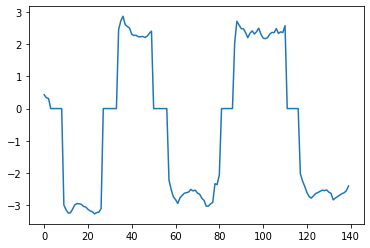

In [363]:
plt.plot(tail_array_HR_flat[id[0],140*6:140*7])

<ipython-input-364-0f55aecdce61>:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


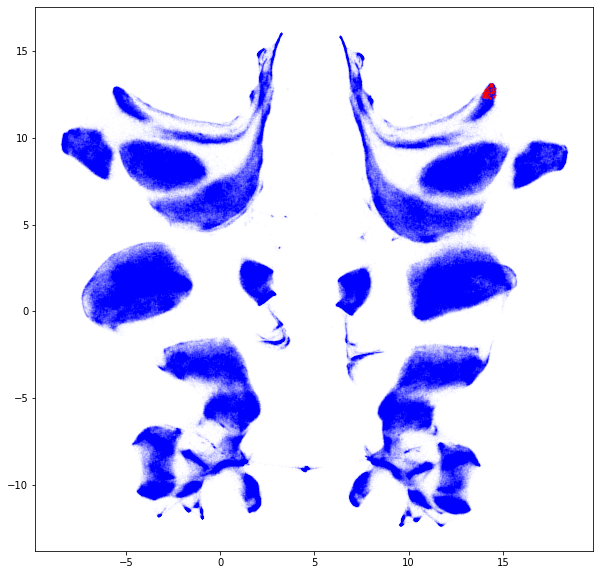

In [364]:
plt.figure(figsize=(10,10))
plt.scatter(embedding[:,0],embedding[:,1],s=1,alpha=0.01,c='blue')
plt.scatter(embadding_HR[id,0],embadding_HR[id,1],s=1,c='red')
plt.show()

(-0.5, 510.5, -0.5, 510.5)

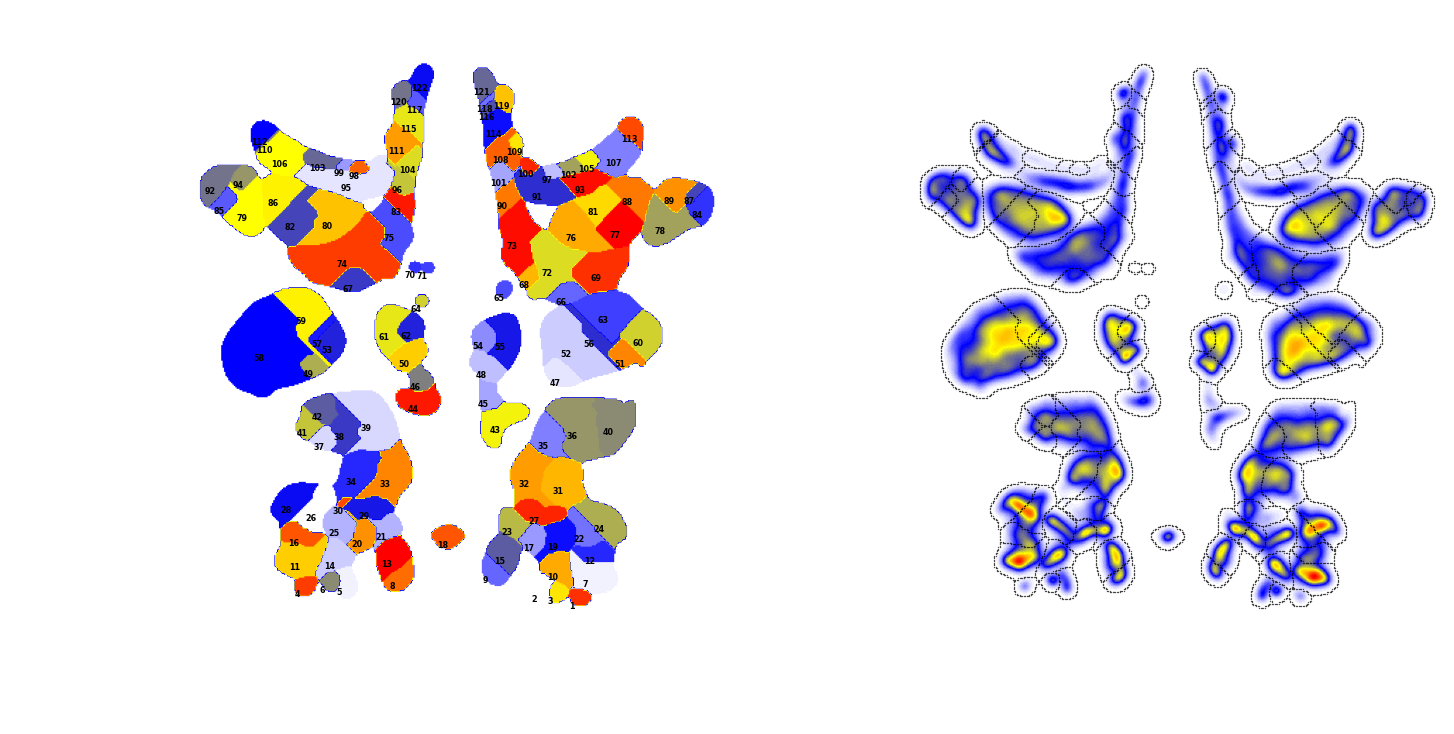

In [273]:
plt.switch_backend('Agg')

fig, axes = plt.subplots(1, 2, figsize=(20, 12))
fig.subplots_adjust(0, 0, 1, 1, 0, 0)
ax = axes[0]
ax.imshow(randomizewshed(wshed), origin='lower', cmap=bmapcmap)
for i in np.unique(wshed)[1:]:
    fontsize = 8
    xinds, yinds = np.where(wshed == i)
    ax.text(np.mean(yinds) - fontsize, np.mean(xinds) - fontsize, str(i), fontsize=fontsize, fontweight='bold')
ax.axis('off')

ax = axes[1]
ax.imshow(density, origin='lower', cmap=bmapcmap)
ax.scatter(wbounds[0], wbounds[1], color='k', s=0.1)
ax.axis('off')

In [232]:
density.shape

(511, 511)

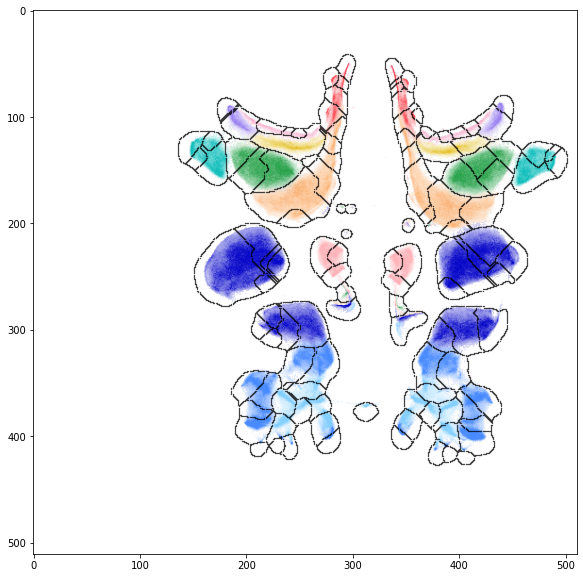

In [233]:
plt.figure(figsize=(10,10))
res = plot_Umap_res(embedding,bout_cat,dict_color_bouts,size=511,limit=18)
plt.imshow(res.to_pil())
plt.scatter(wbounds[0], 511-wbounds[1], color='k', s=0.1)


# PLAN

In [ ]:


bmapcmap = gencmap()


def wshedTransform(zValues, min_regions, sigma, tsnefolder, saveplot=True):
    print('Starting watershed transform...')

    bounds, xx, density = findPointDensity(zValues, sigma, 610,
                                                   rangeVals=[-np.abs(zValues).max() - 15, np.abs(zValues).max() + 15])
    wshed = watershed(-density, connectivity=10)
    wshed[density < 1e-5] = 0
    numRegs = len(np.unique(wshed)) - 1

    if numRegs < min_regions - 10:
        raise ValueError('\t Starting sigma %0.1f too high, maximum # wshed regions possible is %i.' %
                         (sigma, numRegs))

    while numRegs > min_regions:
        sigma += 0.05
        _, xx, density = findPointDensity(zValues, sigma, 610,
                                                  rangeVals=[-np.abs(zValues).max() - 15, np.abs(zValues).max() + 15])
        wshed = watershed(-density, connectivity=10)
        wshed[density < 1e-5] = 0

        numRegs = len(np.unique(wshed)) - 1
        print('\t Sigma %0.2f, Regions %i' % (sigma, numRegs), )
    for i, wreg in enumerate(np.unique(wshed)):
        wshed[wshed == wreg] = i
    wbounds = np.where(roberts(wshed).astype('bool'))
    wbounds = (wbounds[1], wbounds[0])
    if saveplot:
        bend = plt.get_backend()
        plt.switch_backend('Agg')

        fig, axes = plt.subplots(1, 2, figsize=(10, 6))
        fig.subplots_adjust(0, 0, 1, 1, 0, 0)
        ax = axes[0]
        ax.imshow(randomizewshed(wshed), origin='lower', cmap=bmapcmap)
        for i in np.unique(wshed)[1:]:
            fontsize = 8
            xinds, yinds = np.where(wshed == i)
            ax.text(np.mean(yinds) - fontsize, np.mean(xinds) - fontsize, str(i), fontsize=fontsize, fontweight='bold')
        ax.axis('off')

        ax = axes[1]
        ax.imshow(density, origin='lower', cmap=bmapcmap)
        ax.scatter(wbounds[0], wbounds[1], color='k', s=0.1)
        ax.axis('off')

        fig.savefig(tsnefolder + 'zWshed%i.png' % numRegs)
        plt.close()
        plt.switch_backend(bend)
    return wshed, wbounds, sigma, xx, density


def velGMM(ampV, parameters, projectPath, saveplot=True):
    if parameters.method == 'TSNE':
        if parameters.waveletDecomp:
            tsnefolder = projectPath + '/TSNE/'
        else:
            tsnefolder = projectPath + '/TSNE_Projections/'
    else:
        tsnefolder = projectPath+'/UMAP/'
    ampVels = ampV * parameters['samplingFreq']
    vellog10all = np.log10(ampVels[ampVels > 0])
    npoints = min(50000, len(vellog10all))

    vellog10 = np.random.choice(vellog10all, size=npoints, replace=False)


    gm = GaussianMixture(n_components=2, verbose=1, tol=1e-5, max_iter=2000, n_init=1, reg_covar=1e-3)
    inds = np.random.randint(0, vellog10.shape[0], size=npoints)
    gm = gm.fit(vellog10[inds, None])
    minind = np.argmin(gm.means_.squeeze())

    if saveplot:
        bend = plt.get_backend()
        plt.switch_backend('Agg')
        fig, ax = plt.subplots(figsize=(8, 8))
        bins = ax.hist(vellog10, bins=200, density=True, color='k', alpha=0.5)
        bins = bins[1]
        p_score = np.exp(gm.score_samples(bins[:, None]))
        ax.plot(bins, p_score, color='k', alpha=0.5)

        for (c, compno, mu, sigma, p) in \
                zip(['royalblue', 'firebrick'], [1, 2], gm.means_.squeeze(), np.sqrt(gm.covariances_.squeeze()),
                    gm.weights_):
            ax.plot(bins, getPDF(bins, mu, sigma, p), label='Component %i' % compno, color=c, alpha=0.5)

        ax.plot(bins, gm.predict_proba(bins[:, None])[:, minind], label='pRest')
        ax.axvline(bins[np.where(gm.predict_proba(bins[:, None])[:, minind] < 0.33)[0][0]], color='firebrick',
                   label='pRest=0.33')
        ax.legend()
        ax.set_xlabel(r'$log_{10}$ Velocity')
        ax.set_ylabel('PDF')

        fig.savefig(tsnefolder + 'zVelocity.png', )
        plt.close()
        plt.switch_backend(bend)

    pRest = np.zeros_like(ampVels)
    pRest[ampVels == 0] = 0.0
    pRest[ampVels > 0] = gm.predict_proba(vellog10all[:, None])[:, minind]
    return ampV, pRest


def makeGroupsAndSegments(watershedRegions, zValLens):
    min_length = 60

    inds = np.zeros_like(watershedRegions)
    start = 0
    for l in zValLens:
        inds[start:start + l] = np.arange(l)
        start += l
    vinds = np.digitize(np.arange(watershedRegions.shape[0]), bins=np.concatenate([[0], np.cumsum(zValLens)]))

    splitinds = np.where(np.diff(watershedRegions, axis=0) != 0)[0] + 1
    inds = [i for i in np.split(inds, splitinds) if len(i) > min_length]
    wregs = [i[0] for i in np.split(watershedRegions, splitinds) if len(i) > min_length]

    vinds = [i for i in np.split(vinds, splitinds) if len(i) > min_length]
    groups = [np.empty((0, 3), dtype=int)] * watershedRegions.max()

    for wreg, tind, vind in zip(wregs, inds, vinds):
        if np.all(vind == vind[0]):
            groups[wreg - 1] = np.concatenate(
                [groups[wreg - 1], np.array([vind[0], tind[0] + 1, tind[-1] + 1])[None, :]])
    groups = np.array([[g] for g in groups])
    return groups


def findWatershedRegions(parameters, minimum_regions=150, startsigma=0.1, pThreshold=None,saveplot=True, endident = '*_pcaModes.mat'):
    projectionfolder = parameters.projectPath + '/Projections/'
    if parameters.method == 'TSNE':
        if parameters.waveletDecomp:
            tsnefolder = parameters.projectPath + '/TSNE/'
        else:
            tsnefolder = parameters.projectPath + '/TSNE_Projections/'
    elif parameters.method == 'UMAP':
        tsnefolder = parameters.projectPath+ '/UMAP/'
    else:
        raise ValueError('parameters.method can only take values \'TSNE\' or \'UMAP\'')

    if pThreshold is None:
        pThreshold = [0.33, 0.67]

    zValues = []
    projfiles = glob.glob(projectionfolder + '/'+endident)
    t1 = time.time()

    zValNames = []
    zValLens = []
    ampVels = []
    for pi, projfile in enumerate(projfiles):
        fname = projfile.split('/')[-1].split('.')[0]
        zValNames.append(fname)
        print('%i/%i Loading embedding for %s %0.02f seconds.' % (pi + 1, len(projfiles), fname, time.time() - t1))
        if parameters.method == 'TSNE':
            zValident = 'zVals' if parameters.waveletDecomp else 'zValsProjs'
        else:
            zValident = 'uVals'
        with h5py.File(projectionfolder + fname + '_%s.mat'%zValident, 'r') as h5file:
            zValues.append(h5file['zValues'][:].T)
        ampVels.append(np.concatenate(([0], np.linalg.norm(np.diff(zValues[-1], axis=0), axis=1)), axis=0))
        # with h5py.File(projectionfolder + fname + '_zAmps_vel.mat', 'r') as h5file:
        #     ampVels.append(h5file['ampvel'][:].T.squeeze())

        assert zValues[-1].shape[0] == ampVels[-1].shape[0]
        zValLens.append(zValues[-1].shape[0])

    zValues = np.concatenate(zValues, 0)
    ampVels = np.concatenate(ampVels, 0)
    # print(zValLens)
    zValLens = np.array(zValLens)
    # print(zValNames)
    zValNames = np.array(zValNames, dtype=object)
    LL, wbounds, sigma, xx, density = wshedTransform(zValues, minimum_regions, startsigma, tsnefolder, saveplot=True)

    print('Assigning watershed regions...')
    watershedRegions = np.digitize(zValues, xx)
    watershedRegions = LL[watershedRegions[:, 1], watershedRegions[:, 0]]

    if parameters.method == 'TSNE':
        print('Calculating velocity distributions...')
        ampVels, pRest = velGMM(ampVels, parameters, parameters.projectPath, saveplot=saveplot)

        outdict = {'zValues': zValues, 'zValNames': zValNames, 'zValLens': zValLens, 'sigma': sigma, 'xx': xx,
                   'density': density, 'LL': LL, 'watershedRegions': watershedRegions, 'v': ampVels, 'pRest': pRest,
                   'wbounds': wbounds}
        hdf5storage.write(data=outdict, path='/', truncate_existing=True,
                          filename=tsnefolder + 'zVals_wShed_groups.mat', store_python_metadata=False,
                          matlab_compatible=True)

        print('\t tempsave done.')

        t1 = time.time()
        print('Adjusting non-stereotypic regions to 0...')
        bwconn = np.convolve((np.diff(watershedRegions) == 0).astype(bool), np.array([True, True]))
        pGoodRest = pRest > np.min(pThreshold)
        badinds = ~np.bitwise_and(bwconn, pGoodRest)
        watershedRegions[badinds] = 0
        print('\t Done. %0.02f seconds'%(time.time()-t1))
    else:
        pRest = 1.0
    outdict = {'zValues':zValues, 'zValNames':zValNames, 'zValLens':zValLens, 'sigma':sigma, 'xx':xx,
               'density':density, 'LL':LL, 'watershedRegions':watershedRegions, 'v':ampVels, 'pRest':pRest,
               'wbounds':wbounds}
    hdf5storage.write(data=outdict, path='/', truncate_existing=True,
                          filename=tsnefolder + 'zVals_wShed_groups.mat', store_python_metadata=False,
                          matlab_compatible=True)
    print('\t tempsave done.')

    groups = makeGroupsAndSegments(watershedRegions, zValLens)
    outdict = {'zValues': zValues, 'zValNames': zValNames, 'zValLens': zValLens, 'sigma': sigma, 'xx': xx,
               'density': density, 'LL': LL, 'watershedRegions': watershedRegions, 'v': ampVels, #'pRest': pRest,
               'wbounds': wbounds, 'groups': groups}
    hdf5storage.write(data=outdict, path='/', truncate_existing=True,
                      filename=tsnefolder + 'zVals_wShed_groups.mat', store_python_metadata=False,
                      matlab_compatible=True)

    print('All data saved in %s.'%(tsnefolder.split('/')[-2]+'/zVals_wShed_groups.mat'))

In [62]:
len(outlier_scores)

1964926

In [63]:
id_ = np.argmax(model_.negative_outlier_factor_)

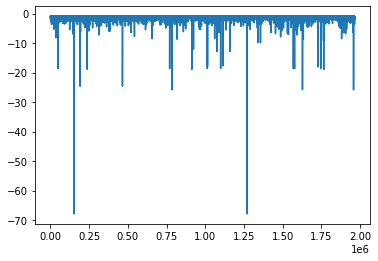

In [64]:
plt.plot(model_.negative_outlier_factor_)

In [68]:
id_sorted = np.argsort(model_.negative_outlier_factor_)[::1]

In [69]:
id_ = id_sorted[0]
outlier_scores[id_]

-1

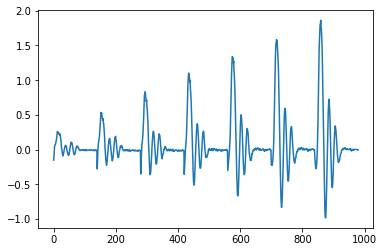

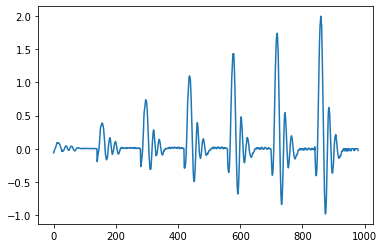

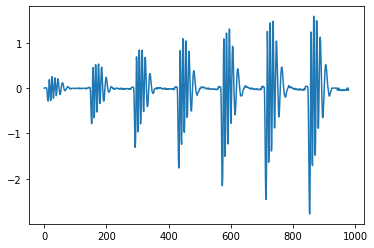

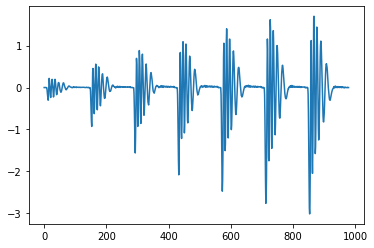

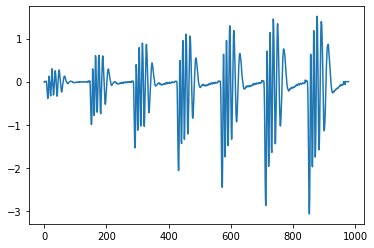

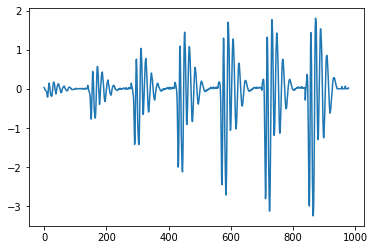

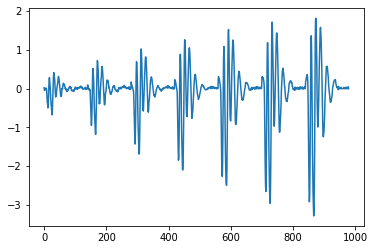

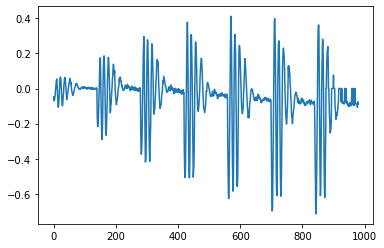

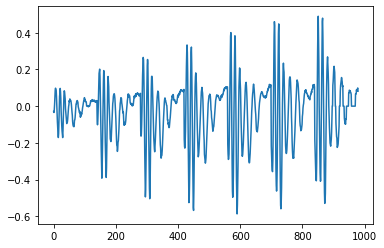

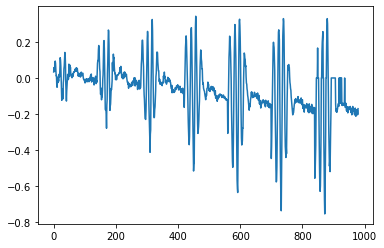

In [70]:
for i in range(10):
    plt.figure()
    plt.plot(tail_array_flat[id_sorted[i],:])

# Test using Balanced Dataset:

In [12]:
m = len(bout_cat)
num_cat = len(np.unique(bout_cat))
print(num_cat)
for b in np.unique(bout_cat):
    id_ = np.where(bout_cat==b)[0]
    m = min(m,len(id_))
print(m)

22
3882


In [22]:
balanced_data = np.zeros((m*num_cat,tail_array_flat.shape[1]))
balanced_cat = np.zeros(m*num_cat)
k = 0

for b in np.unique(bout_cat):
    id_ = np.where(bout_cat==b)[0]
    id_ = np.random.permutation(id_)
    id_ = id_[:m]
    balanced_data[k:k+m,:] = tail_array_flat[id_,:]
    balanced_cat[k:k+m] = b
    k = k+m

In [28]:
mapper = umap.UMAP(n_neighbors=100,min_dist=0.2,target_weight=0.2)
embedding = mapper.fit_transform(balanced_data,balanced_cat)


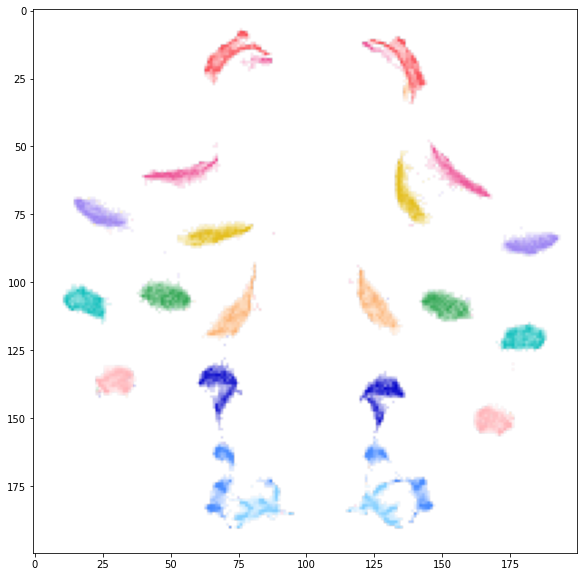

In [29]:
res = plot_Umap_res(embedding,balanced_cat,dict_color_bouts)
plt.figure(figsize=(10,10))
plt.imshow(res.to_pil())
plt.show()

In [30]:
embedding = mapper.transform(tail_array_flat)


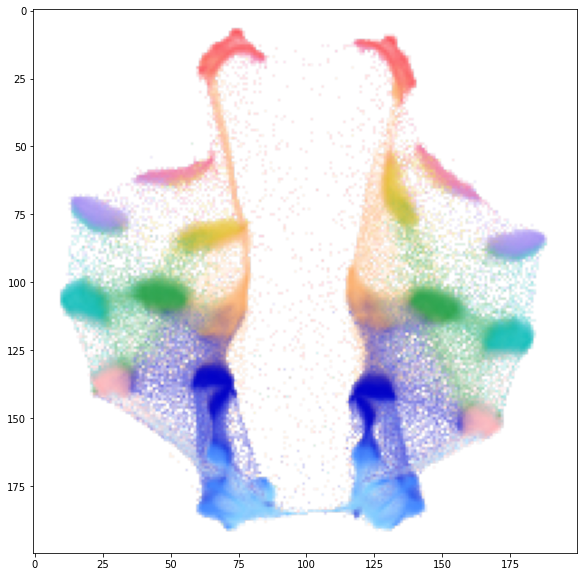

In [31]:
res = plot_Umap_res(embedding,bout_cat,dict_color_bouts)
plt.figure(figsize=(10,10))
plt.imshow(res.to_pil())
plt.show()

# Densmap using Parametric UMAP:

In [36]:
from umap.parametric_umap import ParametricUMAP

In [38]:
embedder = ParametricUMAP(densmap=True, n_components=2)

In [39]:
embedding = embedder.fit_transform(balanced_data,balanced_cat)

Epoch 1/10
13785/13785 [==============================] - 143s 10ms/step - loss: 0.0872
Epoch 2/10
13785/13785 [==============================] - 131s 10ms/step - loss: 0.0750
Epoch 3/10
13785/13785 [==============================] - 131s 10ms/step - loss: 0.0720
Epoch 4/10
13785/13785 [==============================] - 131s 10ms/step - loss: 0.0704
Epoch 5/10
13785/13785 [==============================] - 132s 10ms/step - loss: 0.0695
Epoch 6/10
13785/13785 [==============================] - 131s 10ms/step - loss: 0.0690
Epoch 7/10
13785/13785 [==============================] - 131s 10ms/step - loss: 0.0680
Epoch 8/10
13785/13785 [==============================] - 133s 10ms/step - loss: 0.0677
Epoch 9/10
13785/13785 [==============================] - 131s 10ms/step - loss: 0.0670
Epoch 10/10
13785/13785 [==============================] - 131s 9ms/step - loss: 0.0667


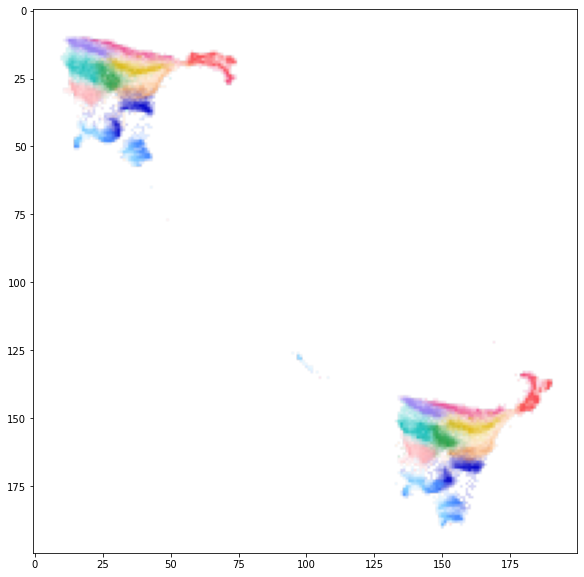

In [40]:
res = plot_Umap_res(embedding,balanced_cat,dict_color_bouts)
plt.figure(figsize=(10,10))
plt.imshow(res.to_pil())
plt.show()


# Test Convnet

In [41]:
import tensorflow as tf


In [43]:
embedder.encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 980)               0         
                                                                 
 dense (Dense)               (None, 100)               98100     
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 z (Dense)                   (None, 2)                 202       
                                                                 
Total params: 118,502
Trainable params: 118,502
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Reshape to 7*140
# Apply Conv2D kernel size (7*3)
# 3 Layers
# 1 Pooling
# 3 Layers
# 1

In [71]:
dims = (980,1)
n_components = 2
encoder = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=dims),
    tf.keras.layers.Reshape((140,7,1),input_shape=dims),
    tf.keras.layers.Conv2D(
        filters=16, kernel_size=3, strides=(1,1), activation="relu", padding="same"
    ),
        tf.keras.layers.Conv2D(
        filters=16, kernel_size=3, strides=(1, 1), activation="relu", padding="same"
    ),
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Conv2D(
        filters=32, kernel_size=3, strides=(1,1), activation="relu", padding="same"
    ),
        tf.keras.layers.Conv2D(
        filters=32, kernel_size=3, strides=(1, 1), activation="relu", padding="same"
    ),
    tf.keras.layers.AveragePooling2D(),
    tf.keras.layers.Conv2D(
        filters=64, kernel_size=3, strides=(1,1), activation="relu", padding="same"
    ),
        tf.keras.layers.Conv2D(
        filters=64, kernel_size=3, strides=(1, 1), activation="relu", padding="same"
    ),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=256, activation="relu"),
    tf.keras.layers.Dense(units=256, activation="relu"),
    tf.keras.layers.Dense(units=n_components),
])
encoder.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_19 (Reshape)        (None, 140, 7, 1)         0         
                                                                 
 conv2d_54 (Conv2D)          (None, 140, 7, 16)        160       
                                                                 
 conv2d_55 (Conv2D)          (None, 140, 7, 16)        2320      
                                                                 
 average_pooling2d_17 (Avera  (None, 70, 3, 16)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_56 (Conv2D)          (None, 70, 3, 32)         4640      
                                                                 
 conv2d_57 (Conv2D)          (None, 70, 3, 32)         9248      
                                                     

In [72]:
mapper = ParametricUMAP(encoder=encoder,dims=(980,1),densmap=True, n_components=2)


C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\umap\parametric_umap.py:148: UserWarning: tensorflow_probability not installed or incompatible to current                 tensorflow installation. Setting global_correlation_loss_weight to zero.
  warn(


In [74]:
embedding = mapper.fit_transform(balanced_data,balanced_cat)

Epoch 1/10


UnimplementedError: Graph execution error:

Detected at node 'gradient_clipped_model_1/sequential_20/conv2d_54/Conv2D' defined at (most recent call last):
    File "c:\Users\adrien\AppData\Local\Programs\Python\Python38\lib\runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "c:\Users\adrien\AppData\Local\Programs\Python\Python38\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\traitlets\config\application.py", line 845, in launch_instance
      app.start()
    File "C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\ipykernel\kernelapp.py", line 619, in start
      self.io_loop.start()
    File "C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "c:\Users\adrien\AppData\Local\Programs\Python\Python38\lib\asyncio\base_events.py", line 570, in run_forever
      self._run_once()
    File "c:\Users\adrien\AppData\Local\Programs\Python\Python38\lib\asyncio\base_events.py", line 1859, in _run_once
      handle._run()
    File "c:\Users\adrien\AppData\Local\Programs\Python\Python38\lib\asyncio\events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\tornado\ioloop.py", line 688, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\tornado\ioloop.py", line 741, in _run_callback
      ret = callback()
    File "C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\tornado\gen.py", line 814, in inner
      self.ctx_run(self.run)
    File "C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\tornado\gen.py", line 775, in run
      yielded = self.gen.send(value)
    File "C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\ipykernel\kernelbase.py", line 358, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\tornado\gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\ipykernel\kernelbase.py", line 261, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\tornado\gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\ipykernel\kernelbase.py", line 536, in execute_request
      self.do_execute(
    File "C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\tornado\gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py", line 302, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\ipykernel\zmqshell.py", line 539, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py", line 2898, in run_cell
      result = self._run_cell(
    File "C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py", line 2944, in _run_cell
      return runner(coro)
    File "C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py", line 3169, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py", line 3361, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py", line 3441, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-74-95fc3eafb949>", line 1, in <module>
      embedding = mapper.fit_transform(balanced_data,balanced_cat)
    File "C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\umap\parametric_umap.py", line 217, in fit_transform
      return super().fit_transform(X, y)
    File "C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\umap\umap_.py", line 2772, in fit_transform
      self.fit(X, y)
    File "C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\umap\parametric_umap.py", line 202, in fit
      return super().fit(X, y)
    File "C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\umap\umap_.py", line 2684, in fit
      self.embedding_, aux_data = self._fit_embed_data(
    File "C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\umap\parametric_umap.py", line 462, in _fit_embed_data
      history = self.parametric_model.fit(
    File "c:\Users\adrien\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\adrien\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\training.py", line 1409, in fit
      tmp_logs = self.train_function(iterator)
    File "c:\Users\adrien\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\training.py", line 1051, in train_function
      return step_function(self, iterator)
    File "c:\Users\adrien\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\training.py", line 1040, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\adrien\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\training.py", line 1030, in run_step
      outputs = model.train_step(data)
    File "C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\umap\parametric_umap.py", line 1135, in train_step
      y_pred = self(x, training=True)  # Forward pass
    File "c:\Users\adrien\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\adrien\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\adrien\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\adrien\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\adrien\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\adrien\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\functional.py", line 458, in call
      return self._run_internal_graph(
    File "c:\Users\adrien\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\adrien\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\adrien\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\training.py", line 490, in __call__
      return super().__call__(*args, **kwargs)
    File "c:\Users\adrien\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\adrien\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\adrien\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\adrien\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\sequential.py", line 374, in call
      return super(Sequential, self).call(inputs, training=training, mask=mask)
    File "c:\Users\adrien\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\functional.py", line 458, in call
      return self._run_internal_graph(
    File "c:\Users\adrien\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\functional.py", line 596, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "c:\Users\adrien\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\adrien\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\base_layer.py", line 1014, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "c:\Users\adrien\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "c:\Users\adrien\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\layers\convolutional\base_conv.py", line 250, in call
      outputs = self.convolution_op(inputs, self.kernel)
    File "c:\Users\adrien\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\layers\convolutional\base_conv.py", line 225, in convolution_op
      return tf.nn.convolution(
Node: 'gradient_clipped_model_1/sequential_20/conv2d_54/Conv2D'
DNN library is not found.
	 [[{{node gradient_clipped_model_1/sequential_20/conv2d_54/Conv2D}}]] [Op:__inference_train_function_440459]

In [10]:
1+1

2

In [1]:
import tensorflow as tf
dims = (28, 28, 1)
n_components = 2
encoder = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=dims),
    tf.keras.layers.Conv2D(
        filters=32, kernel_size=3, strides=(2, 2), activation="relu", padding="same"
    ),
    tf.keras.layers.Conv2D(
        filters=64, kernel_size=3, strides=(2, 2), activation="relu", padding="same"
    ),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=256, activation="relu"),
    tf.keras.layers.Dense(units=256, activation="relu"),
    tf.keras.layers.Dense(units=n_components),
])
encoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 256)               803072    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 2)                 514       
                                                                 
Total params: 888,194
Trainable params: 888,194
Non-trai

In [2]:
from tensorflow.keras.datasets import mnist
(train_images, Y_train), (test_images, Y_test) = mnist.load_data()
train_images = train_images.reshape((train_images.shape[0], -1))/255.
test_images = test_images.reshape((test_images.shape[0], -1))/255.

In [4]:
import umap

In [5]:
# pass encoder network to ParametricUMAP
embedder = umap.ParametricUMAP(encoder=encoder, dims=dims)
embedding = embedder.fit_transform(train_images)

Epoch 1/10


UnknownError:  Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[node gradient_clipped_model/sequential/conv2d/Conv2D
 (defined at c:\Users\adrien\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\layers\convolutional.py:231)
]] [Op:__inference_train_function_1670]

Errors may have originated from an input operation.
Input Source operations connected to node gradient_clipped_model/sequential/conv2d/Conv2D:
In[0] IteratorGetNext (defined at c:\Users\adrien\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\training.py:866)	
In[1] gradient_clipped_model/sequential/conv2d/Conv2D/ReadVariableOp:

Operation defined at: (most recent call last)
>>>   File "c:\Users\adrien\AppData\Local\Programs\Python\Python38\lib\runpy.py", line 194, in _run_module_as_main
>>>     return _run_code(code, main_globals, None,
>>> 
>>>   File "c:\Users\adrien\AppData\Local\Programs\Python\Python38\lib\runpy.py", line 87, in _run_code
>>>     exec(code, run_globals)
>>> 
>>>   File "C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\ipykernel_launcher.py", line 16, in <module>
>>>     app.launch_new_instance()
>>> 
>>>   File "C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\traitlets\config\application.py", line 845, in launch_instance
>>>     app.start()
>>> 
>>>   File "C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\ipykernel\kernelapp.py", line 619, in start
>>>     self.io_loop.start()
>>> 
>>>   File "C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\tornado\platform\asyncio.py", line 199, in start
>>>     self.asyncio_loop.run_forever()
>>> 
>>>   File "c:\Users\adrien\AppData\Local\Programs\Python\Python38\lib\asyncio\base_events.py", line 570, in run_forever
>>>     self._run_once()
>>> 
>>>   File "c:\Users\adrien\AppData\Local\Programs\Python\Python38\lib\asyncio\base_events.py", line 1859, in _run_once
>>>     handle._run()
>>> 
>>>   File "c:\Users\adrien\AppData\Local\Programs\Python\Python38\lib\asyncio\events.py", line 81, in _run
>>>     self._context.run(self._callback, *self._args)
>>> 
>>>   File "C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\tornado\ioloop.py", line 688, in <lambda>
>>>     lambda f: self._run_callback(functools.partial(callback, future))
>>> 
>>>   File "C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\tornado\ioloop.py", line 741, in _run_callback
>>>     ret = callback()
>>> 
>>>   File "C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\tornado\gen.py", line 814, in inner
>>>     self.ctx_run(self.run)
>>> 
>>>   File "C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\tornado\gen.py", line 775, in run
>>>     yielded = self.gen.send(value)
>>> 
>>>   File "C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\ipykernel\kernelbase.py", line 358, in process_one
>>>     yield gen.maybe_future(dispatch(*args))
>>> 
>>>   File "C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\tornado\gen.py", line 234, in wrapper
>>>     yielded = ctx_run(next, result)
>>> 
>>>   File "C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\ipykernel\kernelbase.py", line 261, in dispatch_shell
>>>     yield gen.maybe_future(handler(stream, idents, msg))
>>> 
>>>   File "C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\tornado\gen.py", line 234, in wrapper
>>>     yielded = ctx_run(next, result)
>>> 
>>>   File "C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\ipykernel\kernelbase.py", line 536, in execute_request
>>>     self.do_execute(
>>> 
>>>   File "C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\tornado\gen.py", line 234, in wrapper
>>>     yielded = ctx_run(next, result)
>>> 
>>>   File "C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\ipykernel\ipkernel.py", line 302, in do_execute
>>>     res = shell.run_cell(code, store_history=store_history, silent=silent)
>>> 
>>>   File "C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\ipykernel\zmqshell.py", line 539, in run_cell
>>>     return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
>>> 
>>>   File "C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py", line 2898, in run_cell
>>>     result = self._run_cell(
>>> 
>>>   File "C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py", line 2944, in _run_cell
>>>     return runner(coro)
>>> 
>>>   File "C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
>>>     coro.send(None)
>>> 
>>>   File "C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py", line 3169, in run_cell_async
>>>     has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
>>> 
>>>   File "C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py", line 3361, in run_ast_nodes
>>>     if (await self.run_code(code, result,  async_=asy)):
>>> 
>>>   File "C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py", line 3441, in run_code
>>>     exec(code_obj, self.user_global_ns, self.user_ns)
>>> 
>>>   File "<ipython-input-5-a7b20c2cff9c>", line 3, in <module>
>>>     embedding = embedder.fit_transform(train_images)
>>> 
>>>   File "C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\umap\parametric_umap.py", line 217, in fit_transform
>>>     return super().fit_transform(X, y)
>>> 
>>>   File "C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\umap\umap_.py", line 2772, in fit_transform
>>>     self.fit(X, y)
>>> 
>>>   File "C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\umap\parametric_umap.py", line 202, in fit
>>>     return super().fit(X, y)
>>> 
>>>   File "C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\umap\umap_.py", line 2684, in fit
>>>     self.embedding_, aux_data = self._fit_embed_data(
>>> 
>>>   File "C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\umap\parametric_umap.py", line 462, in _fit_embed_data
>>>     history = self.parametric_model.fit(
>>> 
>>>   File "c:\Users\adrien\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "c:\Users\adrien\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\training.py", line 1216, in fit
>>>     tmp_logs = self.train_function(iterator)
>>> 
>>>   File "c:\Users\adrien\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\training.py", line 878, in train_function
>>>     return step_function(self, iterator)
>>> 
>>>   File "c:\Users\adrien\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\training.py", line 867, in step_function
>>>     outputs = model.distribute_strategy.run(run_step, args=(data,))
>>> 
>>>   File "c:\Users\adrien\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\training.py", line 860, in run_step
>>>     outputs = model.train_step(data)
>>> 
>>>   File "C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\umap\parametric_umap.py", line 1135, in train_step
>>>     y_pred = self(x, training=True)  # Forward pass
>>> 
>>>   File "c:\Users\adrien\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "c:\Users\adrien\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "c:\Users\adrien\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "c:\Users\adrien\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\functional.py", line 451, in call
>>>     return self._run_internal_graph(
>>> 
>>>   File "c:\Users\adrien\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\functional.py", line 589, in _run_internal_graph
>>>     outputs = node.layer(*args, **kwargs)
>>> 
>>>   File "c:\Users\adrien\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "c:\Users\adrien\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "c:\Users\adrien\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "c:\Users\adrien\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\sequential.py", line 373, in call
>>>     return super(Sequential, self).call(inputs, training=training, mask=mask)
>>> 
>>>   File "c:\Users\adrien\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\functional.py", line 451, in call
>>>     return self._run_internal_graph(
>>> 
>>>   File "c:\Users\adrien\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\functional.py", line 589, in _run_internal_graph
>>>     outputs = node.layer(*args, **kwargs)
>>> 
>>>   File "c:\Users\adrien\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "c:\Users\adrien\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\engine\base_layer.py", line 1083, in __call__
>>>     outputs = call_fn(inputs, *args, **kwargs)
>>> 
>>>   File "c:\Users\adrien\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
>>>     return fn(*args, **kwargs)
>>> 
>>>   File "c:\Users\adrien\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\layers\convolutional.py", line 246, in call
>>>     outputs = self.convolution_op(inputs, self.kernel)
>>> 
>>>   File "c:\Users\adrien\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\layers\convolutional.py", line 231, in convolution_op
>>>     return tf.nn.convolution(
>>> 

# Test Outlier detection

# Test Densmap Package:

In [10]:
import densmap

In [28]:
mapper = densmap.densMAP(n_neighbors=30,min_dist=0.1,final_dens=False)


In [29]:
a = np.arange(10)
print(a[::2])
print(a[1::2])

[0 2 4 6 8]
[1 3 5 7 9]


In [30]:
tail_array_flat[::100,:].shape

(19650, 980)

In [38]:
embedding = mapper.fit_transform(tail_array_flat[::100,:],bout_cat[::100])

In [39]:
mapper.embedding_.shape

(19650, 2)

In [44]:
embedding_test = mapper.transform(tail_array_flat[2::100,:])

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1mUnknown attribute 'copy' of type float64
[1m
File "C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\densmap\densmap_.py", line 913:[0m
[1mdef optimize_layout(
    <source elided>
    epoch_of_next_negative_sample = (
[1m        epochs_per_negative_sample.copy()
[0m        [1m^[0m[0m
[0m
[0m[1m[1] During: typing of get attribute at C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\densmap\densmap_.py (913)[0m
[1m
File "C:\Users\adrien\AppData\Roaming\Python\Python38\site-packages\densmap\densmap_.py", line 913:[0m
[1mdef optimize_layout(
    <source elided>
    epoch_of_next_negative_sample = (
[1m        epochs_per_negative_sample.copy()
[0m        [1m^[0m[0m


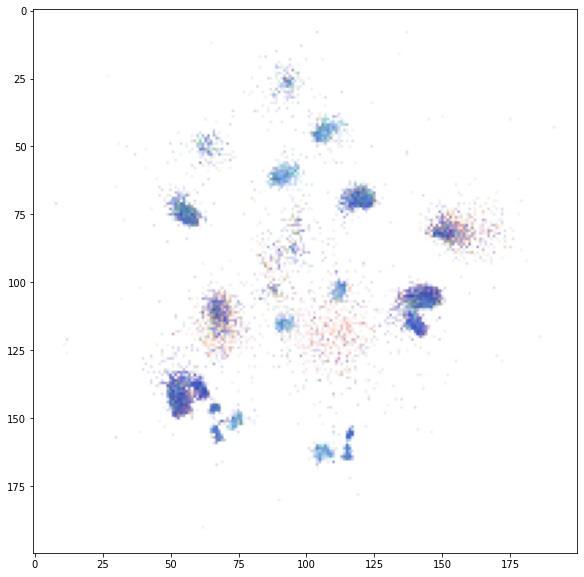

In [ ]:
res = plot_Umap_res(embedding_test,bout_cat[2::100],dict_color_bouts)
plt.figure(figsize=(10,10))
plt.imshow(res.to_pil())
plt.show()

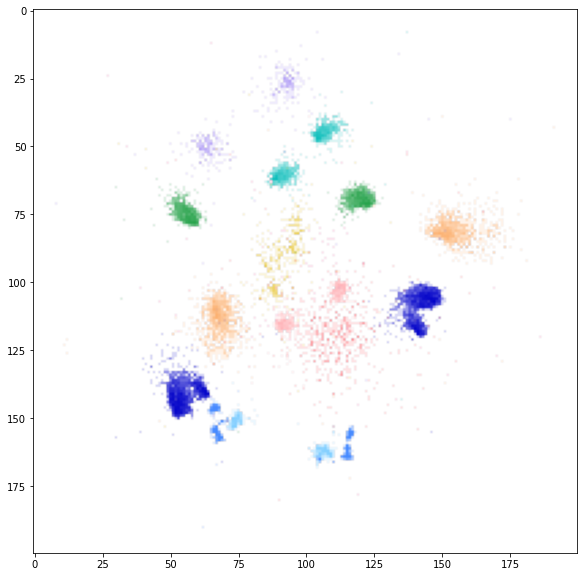

In [43]:
res = plot_Umap_res(embedding,bout_cat[::100],dict_color_bouts)
plt.figure(figsize=(10,10))
plt.imshow(res.to_pil())
plt.show()

In [14]:
#np.savez('Embedding_free_swimming_bouts.npz', precomputed_knn_embeddings,tail_and_traj_array_all_fish, bout_cat_all_fish)

# Full UMAP Benchmarking

In [ ]:
# set_op_mix_ratio [0 0.33 0.66 1]
# target_weight [0 0.2 0.4 0.6]
# min_dist [0, 0.2, 0.5, 0.9]
# n_neighbors = [5, 50, 100, 250]
# -> 256 conditions


# Finding Outliers:

# Density preserving embedding

# Save dataset for Bill:



In [ ]:
tail = knn_training_dataset.tail[:,-1,:]
print(tail.shape)


In [ ]:
20*1000/700

In [ ]:
from super_resolution.downsampling import convert_ms_to_frames

In [ ]:
plt.plot(knn_training_dataset.tail[::10,6,:].T,'k',alpha=0.01)
plt.vlines(20,-3,3)
plt.show()

# Color code

# UMAP

# Trajectory Template

In [ ]:
import matplotlib.gridspec as gridspec
from matplotlib import colors

fig, ax = plt.subplots(facecolor='white',figsize=(20,10)) 

G = gridspec.GridSpec(2,13)
ax0 = {}

for k,b in enumerate(np.unique((knn_training_dataset.labels))):
    b = int(b)
    sg = 1 if b<13 else -1
    ax0 = plt.subplot(G[int((sg+1)*1/2),b%13])
    ax0.set_title(NameCat[b])
    
    id = np.where(knn_training_dataset.labels==b)[0]       
    if len(id)>0:
        id = id[0:1000]
        ax0.plot(knn_training_dataset.traj[id,-1,:].T,'k',alpha=0.01)

    ax0.set_xlim(0,120)
    ax0.set_ylim(-3.6,3.6)
    
    ax0.set_xticks([])
    ax0.set_yticks([])
    
plt.show()


In [ ]:
scale = np.std(np.abs(knn_training_dataset.traj),axis=(0,2))

traj_flat_scaled = knn_training_dataset.traj_flat
traj_flat_scaled[:,0:140] = traj_flat_scaled[:,0:140] /1.6
traj_flat_scaled[:,140:2*140] = traj_flat_scaled[:,140:2*140] /1.9
traj_flat_scaled[:,2*140:] = traj_flat_scaled[:,2*140:] /0.7

In [ ]:
reducer = umap.UMAP(n_components=2,verbose=True)
embedding = reducer.fit_transform(knn_training_dataset.traj_flat)

In [ ]:
plt.figure(figsize=(20,20))
#umap.plot.points(reducer,labels=bouts_df.strain,color_key_cmap='plasma')
umap.plot.points(reducer,labels=knn_training_dataset.labels,color_key=dict_color_bouts)
plt.draw()

# Tail and Traj

In [ ]:
reducer = umap.UMAP(n_components=2,verbose=True)
embedding = reducer.fit_transform(knn_training_dataset.tail_and_traj_flat)

In [ ]:
knn_training_dataset.tail_and_traj_flat.shape

In [ ]:
plt.plot(knn_training_dataset.tail_and_traj_flat[0,:])

In [ ]:
id = np.arange(6*140,7*140).tolist()+np.arange(9*140,10*140).tolist()
tail_head = knn_training_dataset.tail_and_traj_flat[:,id]

In [ ]:
knn_training_dataset.labels.shape[0]/2

In [ ]:
tail_head = knn_training_dataset.tail_and_traj_flat[:,id]
tail_head = tail_head[0:15400]
label = knn_training_dataset.labels[0:15400]

In [ ]:
reducer = umap.UMAP(n_components=2,verbose=True)
embedding = reducer.fit_transform(tail_head)

In [ ]:
plt.figure(figsize=(20,20))
#umap.plot.points(reducer,labels=bouts_df.strain,color_key_cmap='plasma')
umap.plot.points(reducer,labels=label,color_key=dict_color_bouts)
plt.draw()

# Save for ilqr:

In [ ]:
tail = knn_training_dataset.tail
traj = knn_training_dataset.traj
labels = knn_training_dataset.labels
print(tail.shape,traj.shape,labels.shape)

In [ ]:
import matplotlib as mpl


cmap = plt.cm.rainbow  
cmaplist = [cmap(i) for i in range(cmap.N)]
cmaplist = cmaplist[::30]
print(len(cmaplist))
plt.figure(figsize=(15,4))
for i in range(7):
    plt.plot(tail[::1000,i,:].T,color=cmaplist[i],lw=1)
plt.show()

In [ ]:
i = np.random.randint(tail.shape[0])
plt.plot(tail[i:i+3,-1,:].T)
plt.plot(np.diff(tail[i:i+3,-1,:]).T)

In [ ]:
import matplotlib.gridspec as gridspec
from matplotlib import colors

fig, ax = plt.subplots(facecolor='white',figsize=(20,10)) 

G = gridspec.GridSpec(2,13)
ax0 = {}

for k,b in enumerate(np.unique((knn_training_dataset.labels))):
    b = int(b)
    sg = 1 if b<13 else -1
    ax0 = plt.subplot(G[int((sg+1)*1/2),b%13])
    ax0.set_title(NameCat[b])
    
    id = np.where(knn_training_dataset.labels==b)[0]       
    if len(id)>0:
        id = id[0:1000]
        ax0.plot(np.diff(knn_training_dataset.tail[id,0,:]).T,'k',alpha=0.01)

    ax0.set_xlim(0,120)
    ax0.set_ylim(-0.3,0.3)
    
    ax0.set_xticks([])
    ax0.set_yticks([])
    
plt.show()


In [ ]:
# Increase delay before bouts:

balanced_bouts = np.load('balanced_dataset/tail_angle.npy')
balanced_bouts_raw =np.load('balanced_dataset/tail_angle_raw.npy')
balanced_label = np.load('balanced_dataset/bout_category.npy')
balanced_fish_id =  np.load('balanced_dataset/fish_id.npy')

In [ ]:
balanced_bouts.shape

In [ ]:
knn_training_dataset.tail.shape

In [ ]:

Y = np.zeros((0,140))
Y_no_shift = np.zeros((0,160))
for i in range(20,21):
    Y = np.vstack((Y,balanced_bouts[:,-1,i:i+140]))
    Y_no_shift = np.vstack((Y_no_shift,balanced_bouts[:,-1,:]))


In [ ]:
X = knn_training_dataset.tail[:,-1,:]

In [ ]:
X.shape,Y.shape

In [ ]:
from sklearn.metrics import pairwise_distances_chunked

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
##### Compute NN #####
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(Y, np.random.randint(0,10,len(Y)))
res = knn.kneighbors(X[:,:])

id_nearest = res[1][:,0]

In [ ]:
X.shape

In [ ]:
Y.shape

In [ ]:
id_nearest

In [ ]:
i = np.random.randint(knn_training_dataset.tail.shape[0])
x = knn_training_dataset.tail[i,-1,:]
j = id_nearest[i]#np.argmin(np.linalg.norm(X-x[np.newaxis,:],axis=1))
plt.plot(x)
plt.plot(Y[j,:])
plt.plot(Y_no_shift[j,:])

In [ ]:
selected_bouts = balanced_bouts[id_nearest,:,:]
selected_bouts_raw = balanced_bouts_raw[id_nearest,:,:]
selected_labels = knn_training_dataset.labels
selected_fish_id = balanced_fish_id[id_nearest]

selected_approx_traj = knn_training_dataset.traj

In [ ]:
selected_bouts.shape

In [ ]:
import matplotlib.gridspec as gridspec
from matplotlib import colors

fig, ax = plt.subplots(facecolor='white',figsize=(20,10)) 

G = gridspec.GridSpec(2,13)
ax0 = {}

for k,b in enumerate(np.unique(selected_labels)):
    b = int(b)
    sg = 1 if b<13 else -1
    ax0 = plt.subplot(G[int((sg+1)*1/2),b%13])
    ax0.set_title(NameCat[b])
    
    id = np.where(selected_labels==b)[0]       
    if len(id)>0:
        id = id[0:1000]
        ax0.plot(selected_bouts[id,-1,:].T,'k',alpha=0.01)

    ax0.set_xlim(0,120)
    #ax0.set_ylim(-0.3,0.3)
    ax0.set_ylim(-3.6,3.6)
    ax0.set_xticks([])
    ax0.set_yticks([])
    
plt.show()


In [ ]:
import matplotlib.gridspec as gridspec
from matplotlib import colors

fig, ax = plt.subplots(facecolor='white',figsize=(20,10)) 

G = gridspec.GridSpec(2,13)
ax0 = {}

for k,b in enumerate(np.unique(selected_labels)):
    b = int(b)
    sg = 1 if b<13 else -1
    ax0 = plt.subplot(G[int((sg+1)*1/2),b%13])
    ax0.set_title(NameCat[b])
    
    id = np.where(selected_labels==b)[0]       
    if len(id)>0:
        id = id[0:1000]
        ax0.plot(selected_bouts_raw[id,-1,:].T,'k',alpha=0.01)

    ax0.set_xlim(0,120)
    #ax0.set_ylim(-0.3,0.3)
    ax0.set_ylim(-3.6,3.6)
    ax0.set_xticks([])
    ax0.set_yticks([])
    
plt.show()


In [ ]:
scale = np.linalg.norm(selected_bouts)/np.linalg.norm(np.diff(selected_bouts,axis=2))
selected_bouts_diff = np.diff(selected_bouts,axis=2)*scale
selected_bouts_raw_diff = np.diff(selected_bouts_raw,axis=2)*scale


In [ ]:
i = np.random.randint(selected_bouts.shape[0])
plt.figure()
plt.plot(selected_bouts_raw[i,-1,:])
plt.plot(selected_bouts[i,-1,:])
plt.show()
plt.figure()
plt.plot(selected_bouts_raw_diff[i,-1,:])
plt.plot(selected_bouts_diff[i,-1,:])
plt.show()
#plt.plot(selected_bouts_raw[i,-1,:])

In [ ]:
# Save all:
print(selected_bouts_raw.shape,selected_bouts_raw_diff.shape)
print(selected_bouts.shape,selected_bouts_diff.shape)
print(selected_approx_traj.shape)
print(selected_fish_id.shape)
print(selected_labels.shape)

In [ ]:
np.save('ilqr_vae_dataset/tail_angle_smooth.npy',selected_bouts)
np.save('ilqr_vae_dataset/tail_angle_raw.npy',selected_bouts_raw)
np.save('ilqr_vae_dataset/tail_angle_smooth_diff.npy',selected_bouts_diff)
np.save('ilqr_vae_dataset/tail_angle_raw_diff.npy',selected_bouts_raw_diff)
np.save('ilqr_vae_dataset/labels.npy',selected_labels)
np.save('ilqr_vae_dataset/fish_id.npy',selected_fish_id)
np.save('ilqr_vae_dataset/approx_traj.npy',selected_approx_traj)